# Project: Comparing Machine Learning Algorithms for Alzheimer's Disease Classification


### Aims:

The goal of this project is to explore how various machine learning algorithms affect the accuracy of Alzheimer’s disease classification, with the aim of identifying the most effective model to improve diagnostic tools for this complex condition, thereby facilitating early detection and timely intervention.

 ### Roadmap of this notebook:

 1. Overview of the dataset

 2. Data fetching

 3. Preliminary sanity checking and preparing for exploratory data analysis and visualisation

 4. Exploratory visualisation

 5. Exploratory statistical analysis

 6. Selecting the input features

 7. Run and evaluate models

 8. Visualise Machine Learning results


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## Overview of the dataset
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------

The following, taken from Kaggle, explains what each variable is.

### Patient ID
- **PatientID**: A unique identifier assigned to each patient (4751 to 6900).

### Demographic Details
- **Age**: The age of the patients ranges from 60 to 90 years.
- **Gender**: Gender of the patients, where 0 represents Male and 1 represents Female.
- **Ethnicity**: The ethnicity of the patients, coded as follows:
  - 0: Caucasian
  - 1: African American
  - 2: Asian
  - 3: Other
- **EducationLevel**: The education level of the patients, coded as follows:
  - 0: None
  - 1: High School
  - 2: Bachelor's
  - 3: Higher

### Lifestyle Factors
- **BMI**: Body Mass Index of the patients, ranging from 15 to 40.
- **Smoking**: Smoking status, where 0 indicates No and 1 indicates Yes.
- **AlcoholConsumption**: Weekly alcohol consumption in units, ranging from 0 to 20.
- **PhysicalActivity**: Weekly physical activity in hours, ranging from 0 to 10.
- **DietQuality**: Diet quality score, ranging from 0 to 10.
- **SleepQuality**: Sleep quality score, ranging from 4 to 10.

### Medical History
- **FamilyHistoryAlzheimers**: Family history of Alzheimer's Disease, where 0 indicates No and 1 indicates Yes.
- **CardiovascularDisease**: Presence of cardiovascular disease, where 0 indicates No and 1 indicates Yes.
- **Diabetes**: Presence of diabetes, where 0 indicates No and 1 indicates Yes.
- **Depression**: Presence of depression, where 0 indicates No and 1 indicates Yes.
- **HeadInjury**: History of head injury, where 0 indicates No and 1 indicates Yes.
- **Hypertension**: Presence of hypertension, where 0 indicates No and 1 indicates Yes.

### Clinical Measurements
- **SystolicBP**: Systolic blood pressure, ranging from 90 to 180 mmHg.
- **DiastolicBP**: Diastolic blood pressure, ranging from 60 to 120 mmHg.
- **CholesterolTotal**: Total cholesterol levels, ranging from 150 to 300 mg/dL.
- **CholesterolLDL**: Low-density lipoprotein cholesterol levels, ranging from 50 to 200 mg/dL.
- **CholesterolHDL**: High-density lipoprotein cholesterol levels, ranging from 20 to 100 mg/dL.
- **CholesterolTriglycerides**: Triglycerides levels, ranging from 50 to 400 mg/dL.

### Cognitive and Functional Assessments
- **MMSE**: Mini-Mental State Examination score, ranging from 0 to 30. Lower scores indicate cognitive impairment.
- **FunctionalAssessment**: Functional assessment score, ranging from 0 to 10. Lower scores indicate greater impairment.
- **MemoryComplaints**: Presence of memory complaints, where 0 indicates No and 1 indicates Yes.
- **BehavioralProblems**: Presence of behavioral problems, where 0 indicates No and 1 indicates Yes.
- **ADL**: Activities of Daily Living score, ranging from 0 to 10. Lower scores indicate greater impairment.

### Symptoms
- **Confusion**: Presence of confusion, where 0 indicates No and 1 indicates Yes.
- **Disorientation**: Presence of disorientation, where 0 indicates No and 1 indicates Yes.
- **PersonalityChanges**: Presence of personality changes, where 0 indicates No and 1 indicates Yes.
- **DifficultyCompletingTasks**: Presence of difficulty completing tasks, where 0 indicates No and 1 indicates Yes.
- **Forgetfulness**: Presence of forgetfulness, where 0 indicates No and 1 indicates Yes.

### Diagnosis Information
- **Diagnosis**: Diagnosis status for Alzheimer's Disease, where 0 indicates No and 1 indicates Yes.

### Confidential Information
- **DoctorInCharge**: This column contains confidential information about the doctor in charge, with "XXXConfid" as the value for all patients.


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## Data Fetching
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Setting up to use Kaggle API

In order to retrieve dataset via API, user needs to (1) create a Kaggle account, (2) go to 'Account', and (3) click on 'Create New Token' under the API section. A json file containing your username and API key will download.

Copy this json file into the directory containing this notebook. For your reference, there is an empty one in this directory as an example.

If you have any issues, see here for more info: https://github.com/Kaggle/kaggle-api/blob/main/docs/README.md

When downloading the dataset files from Kaggle, you may receive an SSL error message. This may happen if you are working on corporate-managed device, and throws a certificatie verification error. If you have trouble fetching, you can just skip to reading in copy from `data/source`.

In [26]:
!pip3 install seaborn
!pip3 install scipy
!pip3 install scikit-learn
!pip3 install kaggle

In [27]:
# Import libraries
import pandas as pd
import os
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import re

import scipy.stats as stats
from scipy.stats import shapiro

# Scikit-learn
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, train_test_split
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix, f1_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC

In [28]:
pwd

'C:\\Users\\wendy\\CFG\\Specialisation DS\\Project'

In [29]:
# Let's open the file and load the data
with open('kaggle.json', 'r') as file:
    data = json.load(file)


username = data.get('username')
key = data.get('key')

# Set username and key as environment variables
os.environ['KAGGLE_USERNAME'] = username
os.environ['KAGGLE_KEY'] = key

#import kaggle
import kaggle

In [30]:
# Authenticate (uses username and key) and download dataset (set unzip to True)
kaggle.api.authenticate()

# Downloads to 'source' directory
kaggle.api.dataset_download_files('rabieelkharoua/alzheimers-disease-dataset', path='data/source', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset


In [31]:
# Read in downloaded data using pandas and print out
# You can skip to this section if you cannot make API fetching work
data = pd.read_csv('data/source/alzheimers_disease_data.csv')

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### Preliminary sanity checking
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [33]:
#checking out the data 
data.head()

PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       4751   73       0          0               2  22.927749        0   
1       4752   89       0          0               0  26.827681        0   
2       4753   73       0          3               1  17.795882        0   
3       4754   74       1          0               1  33.800817        1   
4       4755   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  ...  MemoryComplaints  \
0           13.297218          6.327112     1.347214  ...                 0   
1            4.542524          7.619885     0.518767  ...                 0   
2           19.555085          7.844988     1.826335  ...                 0   
3           12.209266          8.428001     7.435604  ...                 0   
4           18.454356          6.310461     0.795498  ...                 0   

   BehavioralProblems       ADL  Confusion  Disorientation  \
0                   0  1.725883          0               0   
1                   0  2.592424          0               0   
2                   0  7.119548          0               1   
3                   1  6.481226          0               0   
4                   0  0.014691          0               0   

   PersonalityChanges  DifficultyCompletingTasks  Forgetfulness  Diagnosis  \
0                   0                          1              0          0   
1                   0                          0              1          0   
2                   0                          1              0          0   
3                   0                          0              0          0   
4                   1                          1              0          0   

   DoctorInCharge  
0       XXXConfid  
1       XXXConfid  
2       XXXConfid  
3       XXXConfid  
4       XXXConfid  

[5 rows x 35 columns]

In [34]:
# Checking how many rows and columns 
data.shape

(2149, 35)

In [35]:
# Check column names
data.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

In [36]:
# Calculate the percentage of missing values in each column of our data
percent_missing = data.isnull().sum() * 100 / len(data)
percent_missing # No missing data for any of the variables

PatientID                    0.0
Age                          0.0
Gender                       0.0
Ethnicity                    0.0
EducationLevel               0.0
BMI                          0.0
Smoking                      0.0
AlcoholConsumption           0.0
PhysicalActivity             0.0
DietQuality                  0.0
SleepQuality                 0.0
FamilyHistoryAlzheimers      0.0
CardiovascularDisease        0.0
Diabetes                     0.0
Depression                   0.0
HeadInjury                   0.0
Hypertension                 0.0
SystolicBP                   0.0
DiastolicBP                  0.0
CholesterolTotal             0.0
CholesterolLDL               0.0
CholesterolHDL               0.0
CholesterolTriglycerides     0.0
MMSE                         0.0
FunctionalAssessment         0.0
MemoryComplaints             0.0
BehavioralProblems           0.0
ADL                          0.0
Confusion                    0.0
Disorientation               0.0
Personalit

In [37]:
# Check for duplicates
print(data.duplicated().sum()) # there are none

0


In [38]:
# Check data types of columns (they are all numeric, except doctor in charge)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## Preparing for exploratory data analysis and visualisation
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------



In [40]:
# DoctorInCharge is an object data type
# To investigate what it is, get the unique values and their counts in the DoctorInCharge column.
doctor_counts = data['DoctorInCharge'].value_counts()

# Print the result
doctor_counts

DoctorInCharge
XXXConfid    2149
Name: count, dtype: int64

In [41]:
# Drop this column + PatientID column as we don't need them for analysis
data = data.drop(['PatientID', 'DoctorInCharge'], axis=1)
data.columns.values # Check the drop

array(['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension',
       'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL',
       'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE',
       'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems',
       'ADL', 'Confusion', 'Disorientation', 'PersonalityChanges',
       'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis'],
      dtype=object)

### Changing Data Types
In the source data, all of the features are numerical (int and float).

We decided to apply the following changes to the data types for **EDA and visualisations**:

#### Continuous Data
- Age
- BMI
- AlcoholConsumption
- PhysicalActivity
- DietQuality
- SleepQuality
- SystolicBP
- DiastolicBP
- CholesterolTotal
- CholesterolLDL
- CholesterolHDL
- CholesterolTriglycerides
- MMSE
- FunctionalAssessment
- ADL

#### Categorical Data
- Gender
- Ethnicity
- EducationLevel
- Smoking
- FamilyHistoryAlzheimers
- CardiovascularDisease
- Diabetes
- Depression
- HeadInjury
- Hypertension
- MemoryComplaints
- BehavioralProblems
- Confusion
- Disorientation
- PersonalityChanges
- DifficultyCompletingTasks
- Forgetfulness
- Diagnosis

In [43]:
# Define list of categorical variables for changing data type to 'category'
categorical_vars = ['Gender', 'Ethnicity', 'EducationLevel', 'Smoking',
                    'FamilyHistoryAlzheimers', 'CardiovascularDisease',
                    'Diabetes', 'Depression', 'HeadInjury','MemoryComplaints',
                    'BehavioralProblems', 'Confusion', 'Disorientation', 'Hypertension',
                    'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis']

# Convert appropriate columns to 'category' type for categorical analysis
for var in categorical_vars:
    data[var] = data[var].astype('category')

# Check it has worked as intended
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Age                        2149 non-null   int64   
 1   Gender                     2149 non-null   category
 2   Ethnicity                  2149 non-null   category
 3   EducationLevel             2149 non-null   category
 4   BMI                        2149 non-null   float64 
 5   Smoking                    2149 non-null   category
 6   AlcoholConsumption         2149 non-null   float64 
 7   PhysicalActivity           2149 non-null   float64 
 8   DietQuality                2149 non-null   float64 
 9   SleepQuality               2149 non-null   float64 
 10  FamilyHistoryAlzheimers    2149 non-null   category
 11  CardiovascularDisease      2149 non-null   category
 12  Diabetes                   2149 non-null   category
 13  Depression                 2149 n

In [44]:
# Describe categorical data to see counts, unique, top, and freq
data[categorical_vars].describe()

Gender  Ethnicity  EducationLevel  Smoking  FamilyHistoryAlzheimers  \
count     2149       2149            2149     2149                     2149   
unique       2          4               4        2                        2   
top          1          0               1        0                        0   
freq      1088       1278             854     1529                     1607   

        CardiovascularDisease  Diabetes  Depression  HeadInjury  \
count                    2149      2149        2149        2149   
unique                      2         2           2           2   
top                         0         0           0           0   
freq                     1839      1825        1718        1950   

        MemoryComplaints  BehavioralProblems  Confusion  Disorientation  \
count               2149                2149       2149            2149   
unique                 2                   2          2               2   
top                    0                   0          0               0   
freq                1702                1812       1708            1809   

        Hypertension  PersonalityChanges  DifficultyCompletingTasks  \
count           2149                2149                       2149   
unique             2                   2                          2   
top                0                   0                          0   
freq            1829                1825                       1808   

        Forgetfulness  Diagnosis  
count            2149       2149  
unique              2          2  
top                 0          0  
freq             1501       1389

In [45]:
# Set list of continuous variables for plotting and analyses below
continuous_vars = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'MMSE',
                   'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolHDL', 'FunctionalAssessment',
                   'CholesterolLDL', 'CholesterolTriglycerides', 'ADL', 'SleepQuality']

In [46]:
# Describe continuous data to see counts, mean, std, min, quartiles, and max
data[continuous_vars].describe()

Age          BMI  AlcoholConsumption  PhysicalActivity  \
count  2149.000000  2149.000000         2149.000000       2149.000000   
mean     74.908795    27.655697           10.039442          4.920202   
std       8.990221     7.217438            5.757910          2.857191   
min      60.000000    15.008851            0.002003          0.003616   
25%      67.000000    21.611408            5.139810          2.570626   
50%      75.000000    27.823924            9.934412          4.766424   
75%      83.000000    33.869778           15.157931          7.427899   
max      90.000000    39.992767           19.989293          9.987429   

       DietQuality         MMSE   SystolicBP  DiastolicBP  CholesterolTotal  \
count  2149.000000  2149.000000  2149.000000  2149.000000       2149.000000   
mean      4.993138    14.755132   134.264774    89.847836        225.197519   
std       2.909055     8.613151    25.949352    17.592496         42.542233   
min       0.009385     0.005312    90.000000    60.000000        150.093316   
25%       2.458455     7.167602   112.000000    74.000000        190.252963   
50%       5.076087    14.441660   134.000000    91.000000        225.086430   
75%       7.558625    22.161028   157.000000   105.000000        262.031657   
max       9.998346    29.991381   179.000000   119.000000        299.993352   

       CholesterolHDL  FunctionalAssessment  CholesterolLDL  \
count     2149.000000           2149.000000     2149.000000   
mean        59.463533              5.080055      124.335944   
std         23.139174              2.892743       43.366584   
min         20.003434              0.000460       50.230707   
25%         39.095698              2.566281       87.195798   
50%         59.768237              5.094439      123.342593   
75%         78.939050              7.546981      161.733733   
max         99.980324              9.996467      199.965665   

       CholesterolTriglycerides          ADL  SleepQuality  
count               2149.000000  2149.000000   2149.000000  
mean                 228.281496     4.982958      7.051081  
std                  101.986721     2.949775      1.763573  
min                   50.407194     0.001288      4.002629  
25%                  137.583222     2.342836      5.482997  
50%                  230.301983     5.038973      7.115646  
75%                  314.839046     7.581490      8.562521  
max                  399.941862     9.999747      9.999840

In [47]:
# Check continous variables for outliers
def find_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data< lower_bound) | (data > upper_bound)]

for column in data[continuous_vars].columns:
    outliers = find_outliers_iqr(data[column])
    if not outliers.empty:
        print(f"\nOutliers in '{column}': ", outliers)
    else:
        print(f"\nNo Outliers in '{column}'")


No Outliers in 'Age'

No Outliers in 'BMI'

No Outliers in 'AlcoholConsumption'

No Outliers in 'PhysicalActivity'

No Outliers in 'DietQuality'

No Outliers in 'MMSE'

No Outliers in 'SystolicBP'

No Outliers in 'DiastolicBP'

No Outliers in 'CholesterolTotal'

No Outliers in 'CholesterolHDL'

No Outliers in 'FunctionalAssessment'

No Outliers in 'CholesterolLDL'

No Outliers in 'CholesterolTriglycerides'

No Outliers in 'ADL'

No Outliers in 'SleepQuality'


#### One-Hot Encoding for Un-ordered Categorical Variables

We want to convert categorical variables with more than 2 levels into binary variables if the levels don't have a meaningful order (i.e., non-ordinal).

See good article here: https://www.datacamp.com/tutorial/categorical-data

In this case, this only applies to Ethnicity (because the order of EducationLevel levels is meaningful, i.e., ordinal).

In [49]:
# Check values of categorical variables to see if any need converting further
for var in categorical_vars:
    print (data[var].value_counts())

Gender
1    1088
0    1061
Name: count, dtype: int64
Ethnicity
0    1278
1     454
3     211
2     206
Name: count, dtype: int64
EducationLevel
1    854
2    636
0    446
3    213
Name: count, dtype: int64
Smoking
0    1529
1     620
Name: count, dtype: int64
FamilyHistoryAlzheimers
0    1607
1     542
Name: count, dtype: int64
CardiovascularDisease
0    1839
1     310
Name: count, dtype: int64
Diabetes
0    1825
1     324
Name: count, dtype: int64
Depression
0    1718
1     431
Name: count, dtype: int64
HeadInjury
0    1950
1     199
Name: count, dtype: int64
MemoryComplaints
0    1702
1     447
Name: count, dtype: int64
BehavioralProblems
0    1812
1     337
Name: count, dtype: int64
Confusion
0    1708
1     441
Name: count, dtype: int64
Disorientation
0    1809
1     340
Name: count, dtype: int64
Hypertension
0    1829
1     320
Name: count, dtype: int64
PersonalityChanges
0    1825
1     324
Name: count, dtype: int64
DifficultyCompletingTasks
0    1808
1     341
Name: count, dtype

In [50]:
# One-hot encode 'Ethnicity' using get_dummies, set to dtype 'int' so that it get's coded as 0/1
encoded_data = pd.get_dummies(data['Ethnicity'], prefix='Ethnicity', drop_first=False, dtype='int')

# Add one-hot variables to dataframe
data_with_dummies = pd.concat([data, encoded_data], axis=1)

In [51]:
# Check data types to see it's worked as intended
data_with_dummies.dtypes

Age                             int64
Gender                       category
Ethnicity                    category
EducationLevel               category
BMI                           float64
Smoking                      category
AlcoholConsumption            float64
PhysicalActivity              float64
DietQuality                   float64
SleepQuality                  float64
FamilyHistoryAlzheimers      category
CardiovascularDisease        category
Diabetes                     category
Depression                   category
HeadInjury                   category
Hypertension                 category
SystolicBP                      int64
DiastolicBP                     int64
CholesterolTotal              float64
CholesterolLDL                float64
CholesterolHDL                float64
CholesterolTriglycerides      float64
MMSE                          float64
FunctionalAssessment          float64
MemoryComplaints             category
BehavioralProblems           category
ADL         

In [52]:
# See how it's 0 and 1
data_with_dummies.Ethnicity_0.value_counts

<bound method IndexOpsMixin.value_counts of 0       1
1       1
2       0
3       1
4       1
       ..
2144    1
2145    1
2146    1
2147    0
2148    1
Name: Ethnicity_0, Length: 2149, dtype: int32>

In [53]:
# Now convert to categorical for consistency in plotting and EDA
encoded_vars = ['Ethnicity_0', 'Ethnicity_1', 'Ethnicity_2', 'Ethnicity_3']
data_with_dummies[encoded_vars] = data_with_dummies[encoded_vars].astype('category')

# Check dataypes again
data_with_dummies.dtypes

Age                             int64
Gender                       category
Ethnicity                    category
EducationLevel               category
BMI                           float64
Smoking                      category
AlcoholConsumption            float64
PhysicalActivity              float64
DietQuality                   float64
SleepQuality                  float64
FamilyHistoryAlzheimers      category
CardiovascularDisease        category
Diabetes                     category
Depression                   category
HeadInjury                   category
Hypertension                 category
SystolicBP                      int64
DiastolicBP                     int64
CholesterolTotal              float64
CholesterolLDL                float64
CholesterolHDL                float64
CholesterolTriglycerides      float64
MMSE                          float64
FunctionalAssessment          float64
MemoryComplaints             category
BehavioralProblems           category
ADL         

## Exploratory Visualisations

In the following, we visualise the distributions and averages of our variables: (1) overall and (2) split by diagnosis.

In [55]:
# Before doing anything, we can set up dictionary for categorical variables for plotting purposes
categorical_mappings = {
    "Gender": {
        0: "Male",
        1: "Female"
    },
    "Ethnicity": {
        0: "Caucasian",
        1: "Afr-American",
        2: "Asian",
        3: "Other"
    },
    "EducationLevel": {
        0: "None",
        1: "High School",
        2: "Bachelor's",
        3: "Higher"
    },
    "Smoking": {
        0: "No",
        1: "Yes"
    },
    "FamilyHistoryAlzheimers": {
        0: "No",
        1: "Yes"
    },
    "CardiovascularDisease": {
        0: "No",
        1: "Yes"
    },
    "Diabetes": {
        0: "No",
        1: "Yes"
    },
    "Depression": {
        0: "No",
        1: "Yes"
    },
    "HeadInjury": {
        0: "No",
        1: "Yes"
    },
    "Hypertension": {
        0: "No",
        1: "Yes"
    },
    "MemoryComplaints": {
        0: "No",
        1: "Yes"
    },
    "BehavioralProblems": {
        0: "No",
        1: "Yes"
    },
    "Confusion": {
        0: "No",
        1: "Yes"
    },
    "Disorientation": {
        0: "No",
        1: "Yes"
    },
    "PersonalityChanges": {
        0: "No",
        1: "Yes"
    },
    "DifficultyCompletingTasks": {
        0: "No",
        1: "Yes"
    },
    "Forgetfulness": {
        0: "No",
        1: "Yes"
    },
    "Diagnosis": {
        0: "No",
        1: "Yes"
    }
}

In [56]:
# Define function to make titles and axis labels prettier for plotting
def format_variable(variable_name):
    # Find all patterns where a lowercase letter is followed by an uppercase letter and add space
    formatted_variable = re.sub(r'(?<=[a-z])(?=[A-Z])', ' ', variable_name)
    return formatted_variable

#### Distribution in Continuous Variables

In [84]:
# Set the number of rows and columns for continuous figures
continuous_cols = 3
continous_rows = 5

##### Violin Plots: Overall

One way to look at distributions is to use violin plots. Unlike a box plot, each violin is drawn using a kernel density estimate (KDE) of the underlying distribution.

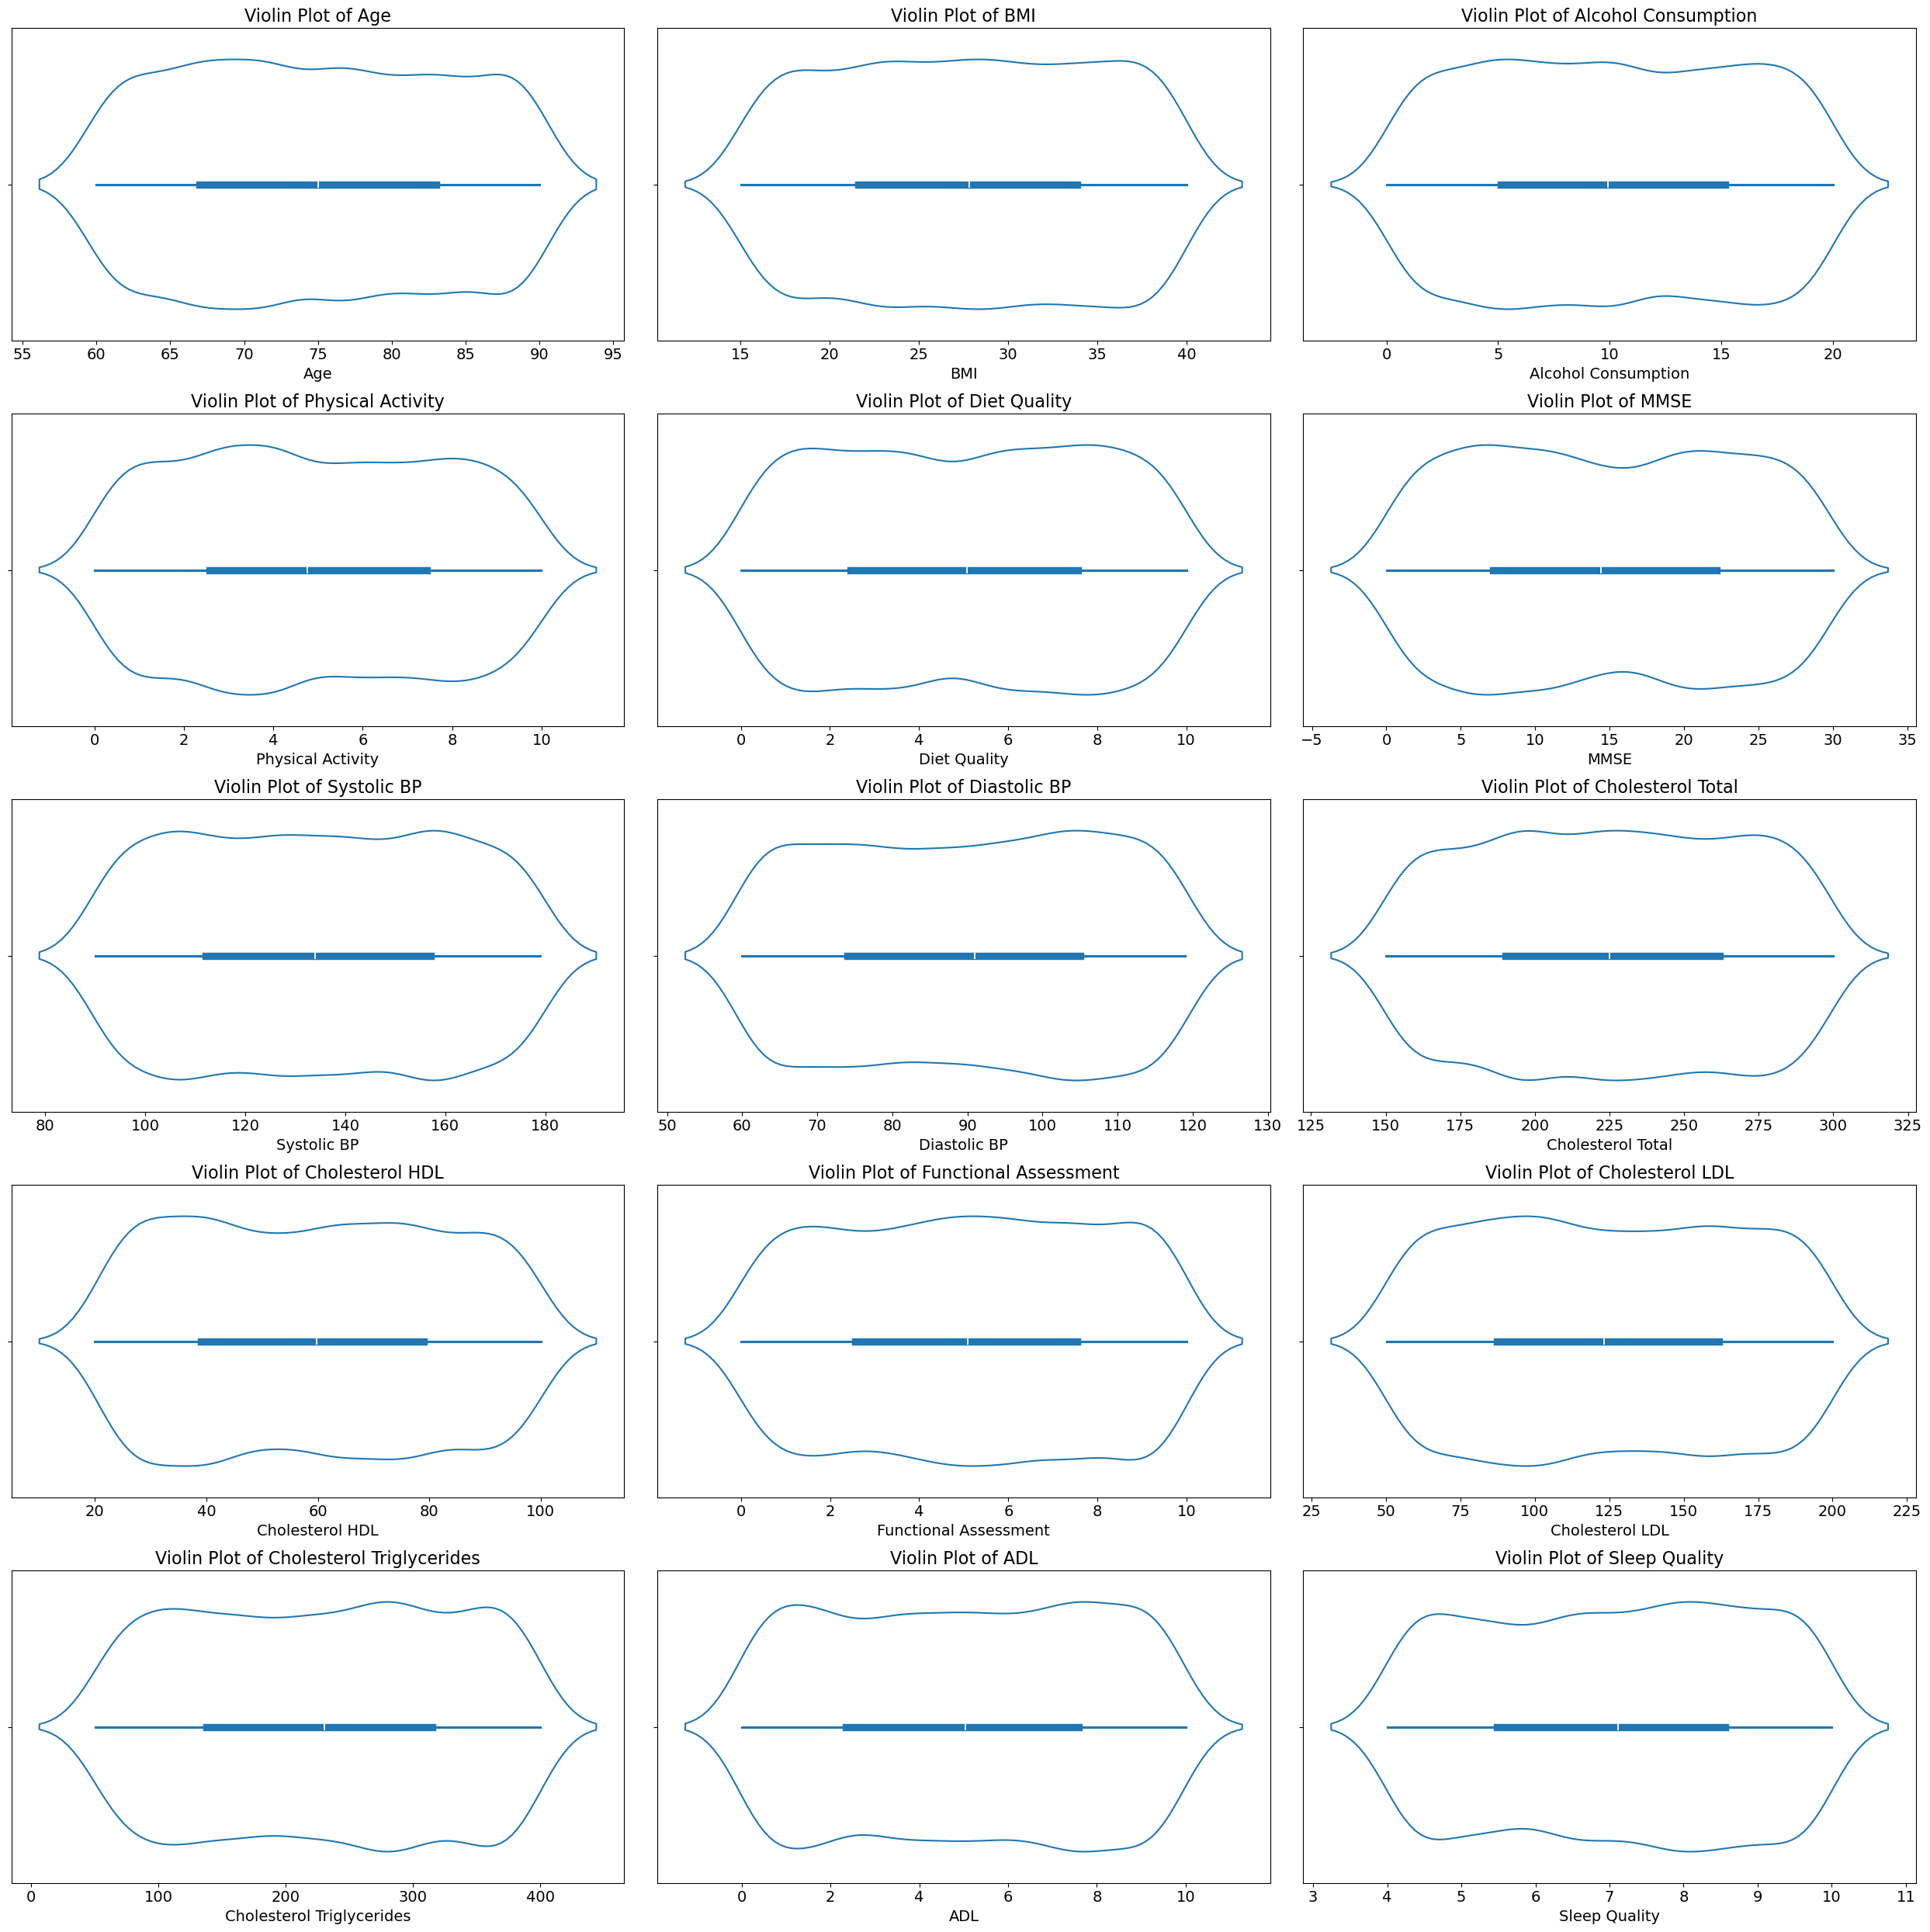

In [88]:
# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=continous_rows,
                         ncols=continuous_cols,
                         figsize=(25, 25))

# Flatten the axes array for easy iteration in loop below
axes = axes.flatten()

# Loop over the variables create a violin plot for each one
for i, col in enumerate(continuous_vars):
    sns.violinplot(x=data_with_dummies[col], ax=axes[i], native_scale=True, fill=False)

    # Call user function to make a 'pretty' version of col for plotting
    pretty_col = format_variable(col)

    # Set axis title and x labels flexibly using pretty col
    axes[i].set_title(f'Violin Plot of {pretty_col}', fontsize=16)
    axes[i].set_xlabel(pretty_col, fontsize=14)
    axes[i].tick_params(axis='both', which='major', labelsize=14)

# Adjust layout to 'tight'
plt.tight_layout()

# Show the plot
plt.show()

##### Violin Plots: Split by Diagnosis

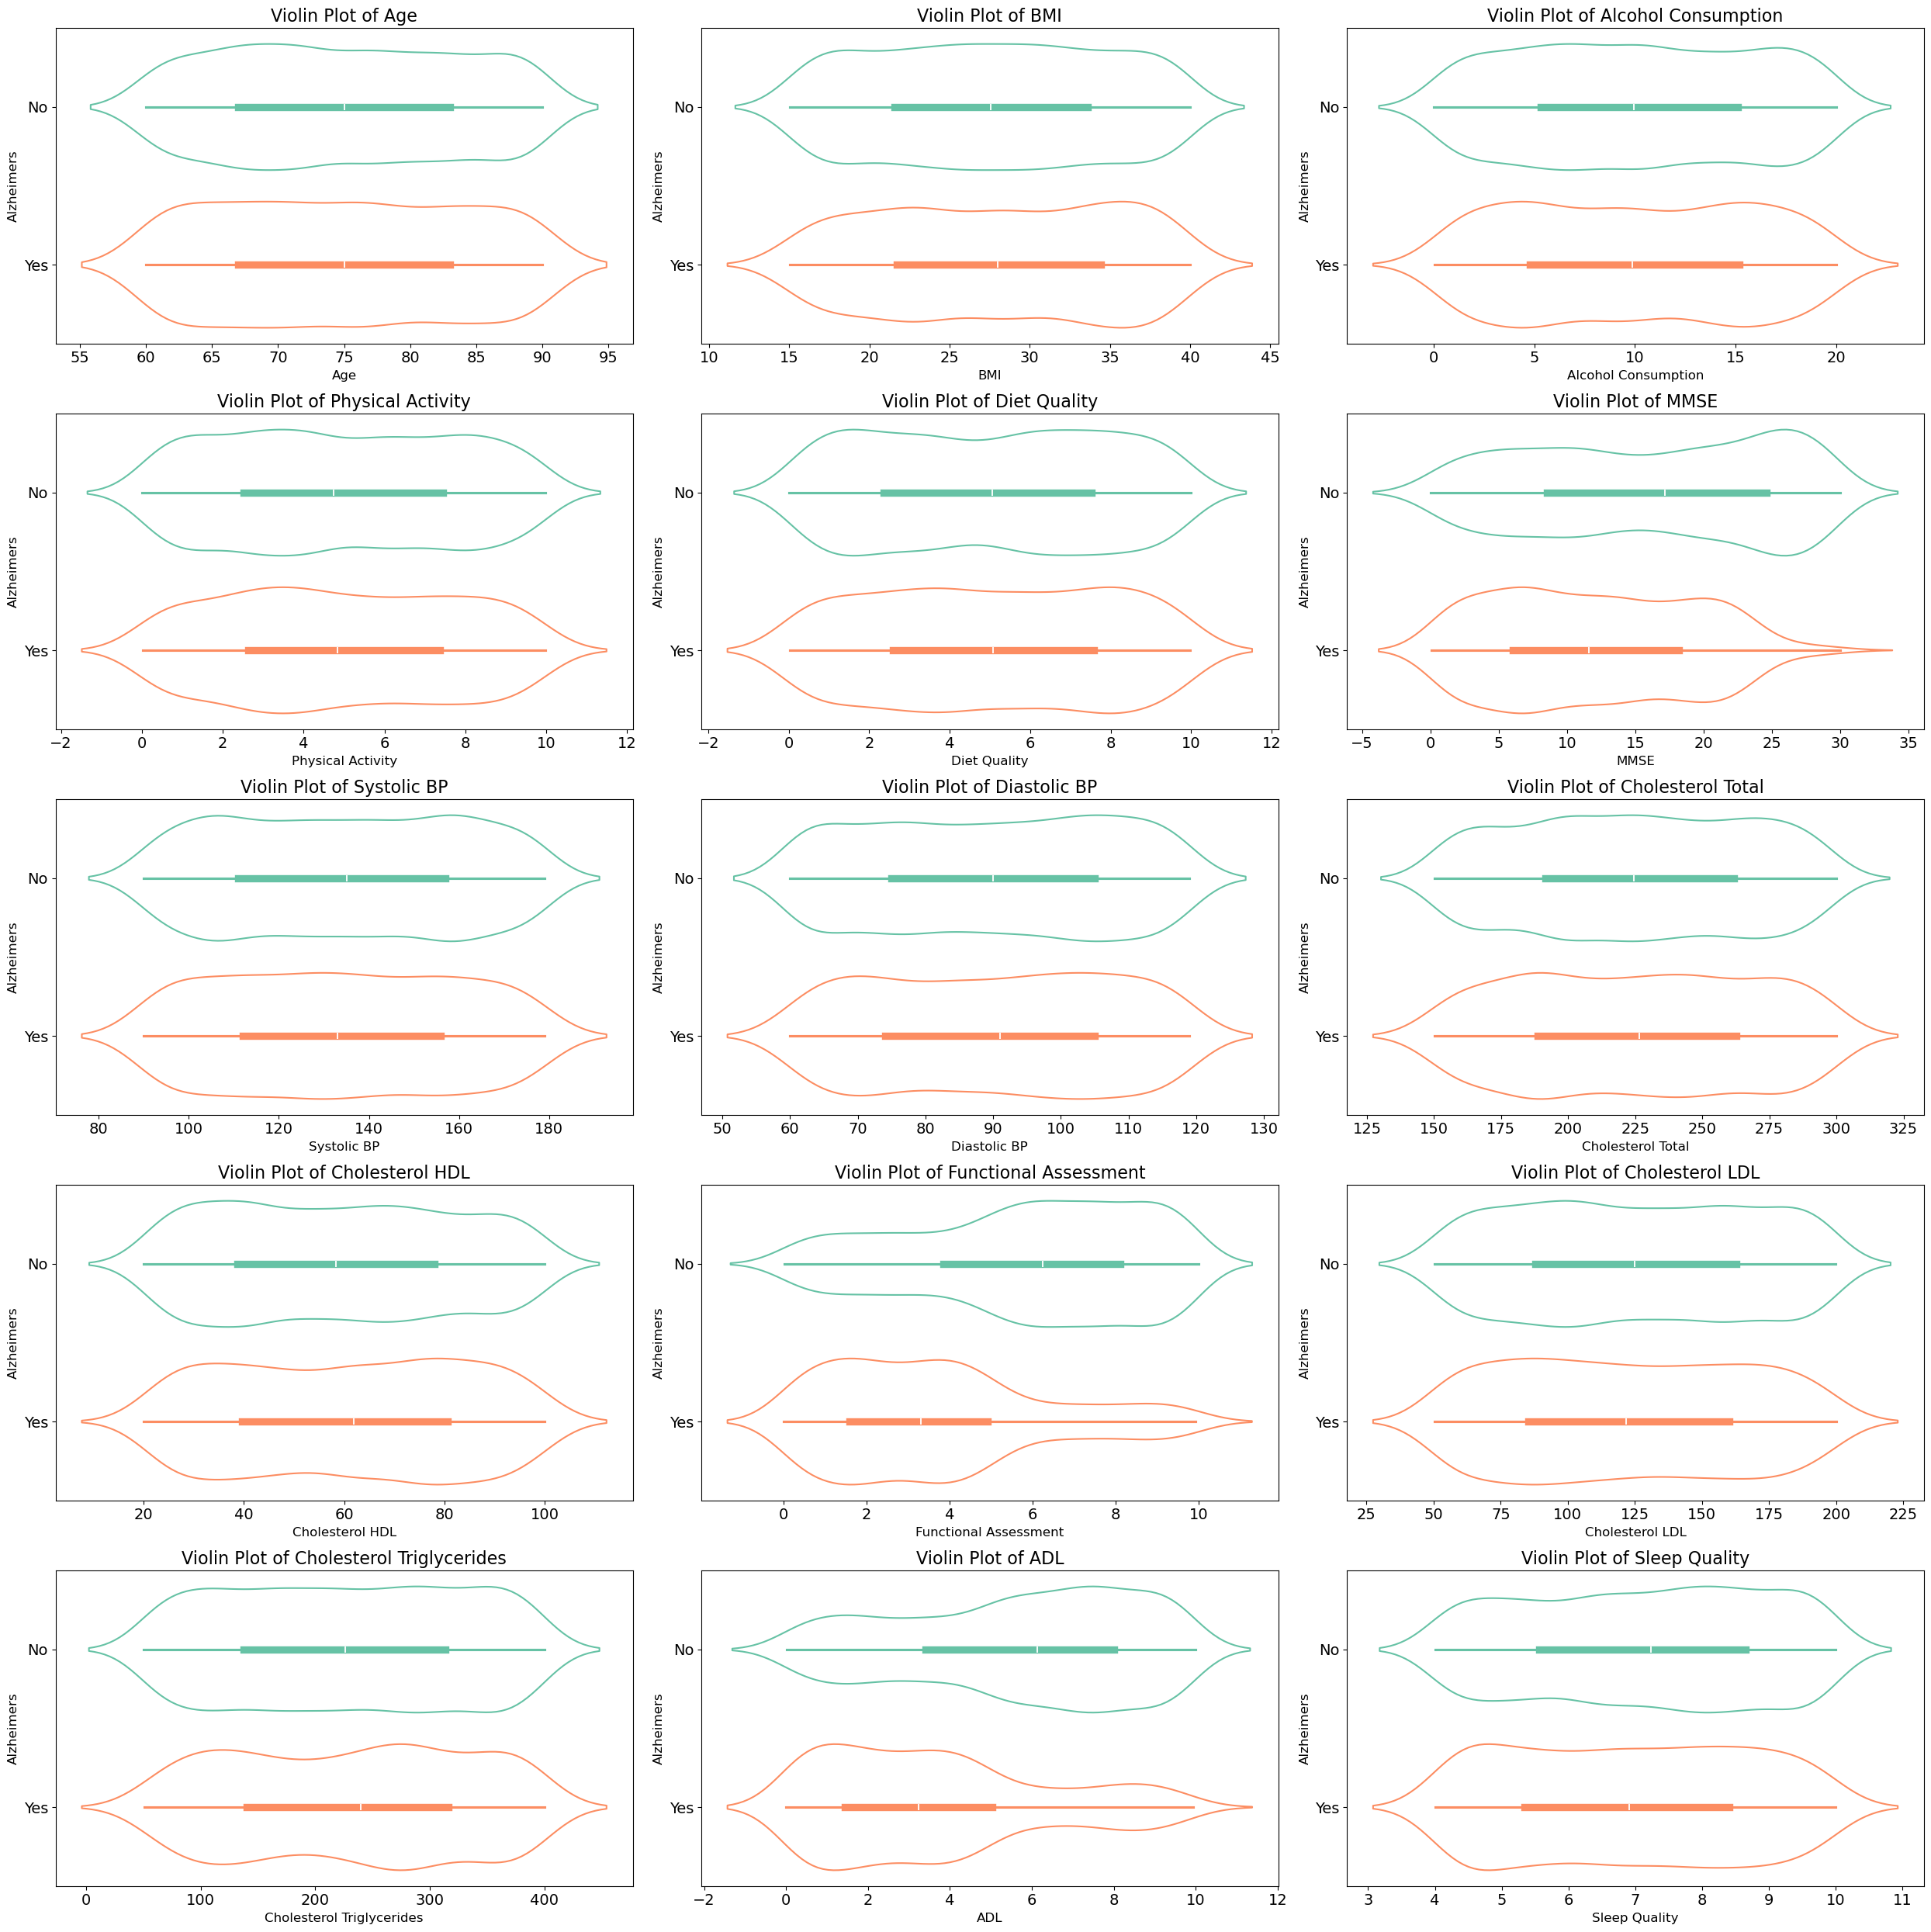

In [92]:
# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=continous_rows, ncols=continuous_cols, figsize=(25, 25))

# Flatten the axes array for easy iteration in loop below
axes = axes.flatten()

# Set up diagnosis labels for y axis using categorical mappings dictionary
diagnosis_labels = [categorical_mappings["Diagnosis"][tick] for tick in [0, 1]]

# Loop over the variables to create a bivariate violin plot for each one
for i, col in enumerate(continuous_vars):
    sns.violinplot(x=data_with_dummies[col],y = data_with_dummies['Diagnosis'],
                   hue = data_with_dummies['Diagnosis'], palette="Set2",
                   legend = False, fill = False, ax=axes[i])

    # Create pretty version of column using user function
    pretty_col = format_variable(col)

    # Set axis title and x labels flexibly
    axes[i].set_title(f'Violin Plot of {pretty_col}', fontsize = 16)
    axes[i].set_xlabel(pretty_col, fontsize = 12)
    axes[i].set_ylabel('Alzheimers',fontsize = 12)
    axes[i].tick_params(axis='both', which='major', labelsize=14)

    # Set y-ticks explicitly to [0, 1] corresponding to Diagnosis (to avoid warning)
    axes[i].set_yticks([0, 1])

    # Map y-tick labels to corresponding diagnosis labels
    axes[i].set_yticklabels(diagnosis_labels)

# Adjust layout to 'tight'
plt.tight_layout()

# Show the plot
plt.show()

##### Box Plots: Overall

Box plots are important for visually detecting any outliers!

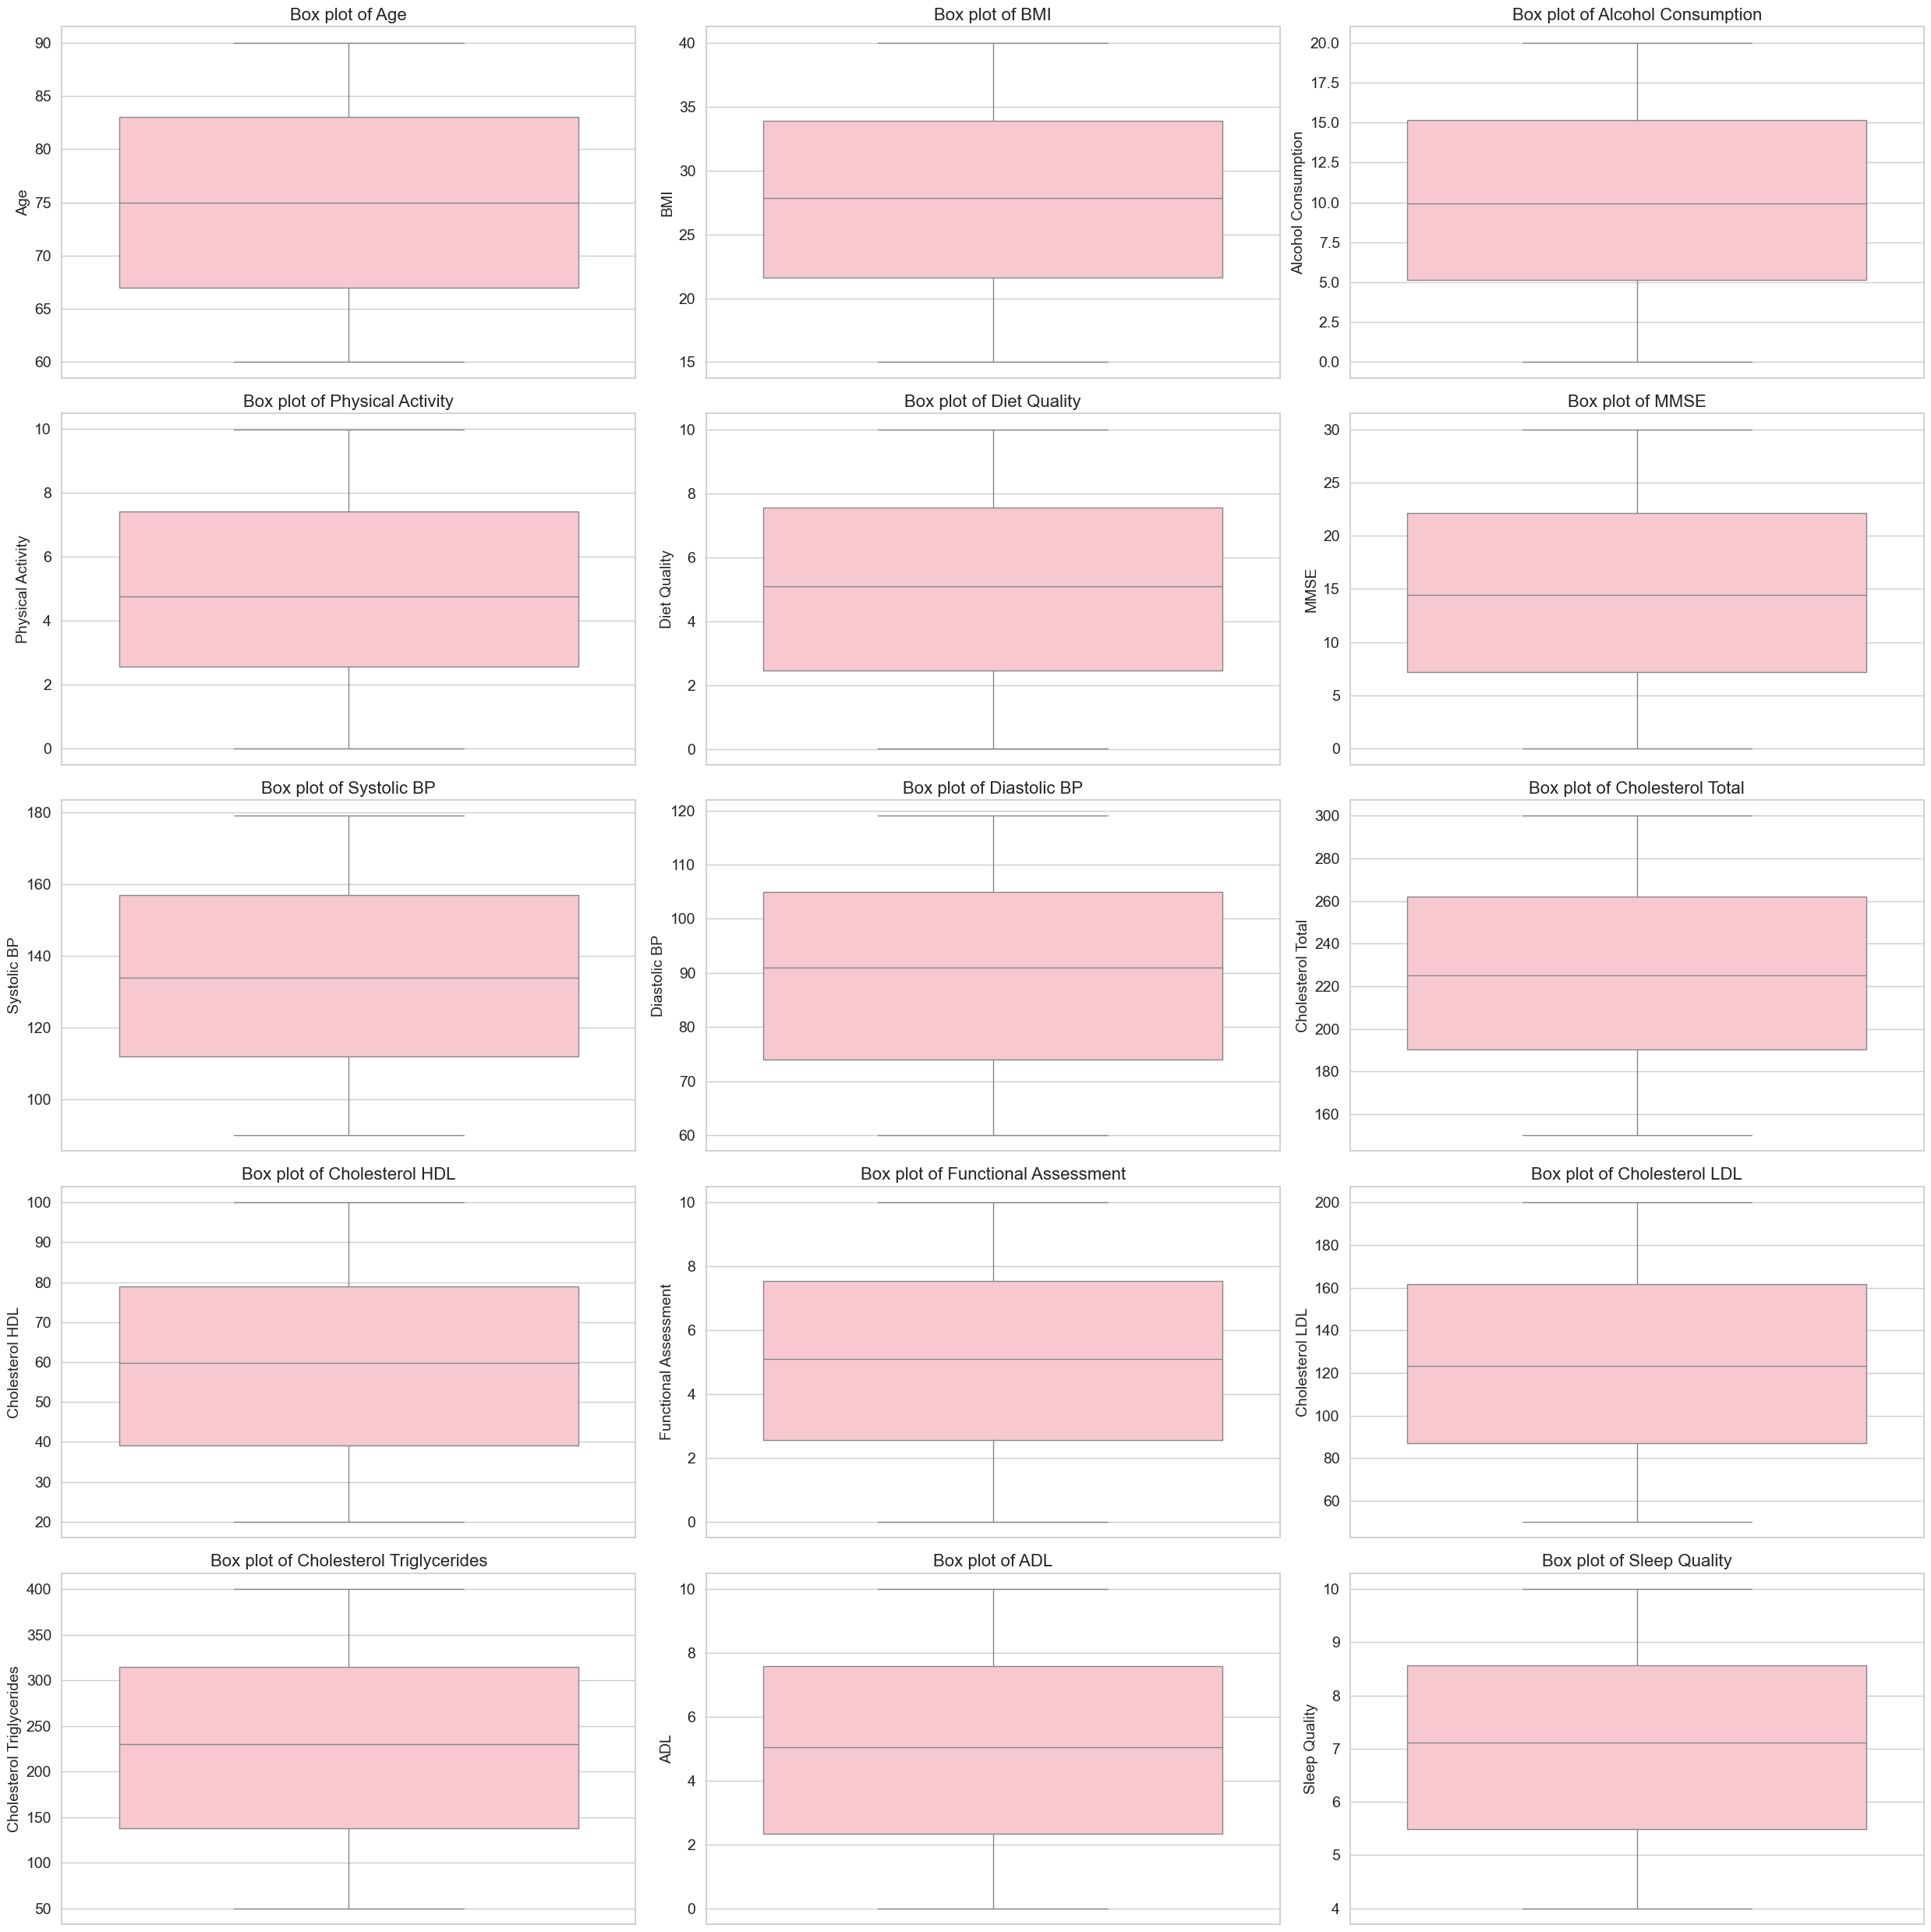

In [563]:
# Setup grid dimensions and figure
fig, axes = plt.subplots(continous_rows,continuous_cols, figsize=(25, 25))
axes = axes.flatten()

# Plot box plots for each continuous variable by Diagnosis
for i, var in enumerate(continuous_vars):
    sns.boxplot(y=data_with_dummies[var], ax=axes[i], color = 'pink')

    # Create pretty version of column using user function
    pretty_col = format_variable(var)

    # Set title and labels
    axes[i].set_title(f'Box plot of {pretty_col}', fontsize = 16)
    axes[i].set_ylabel(pretty_col, fontsize = 14)
    axes[i].tick_params(axis='both', which='major', labelsize=14)

plt.tight_layout()
# Save the figure 
plt.savefig('results/box_plots.png', dpi=300) 
plt.show()


##### Box Plots: Split by Diagnosis

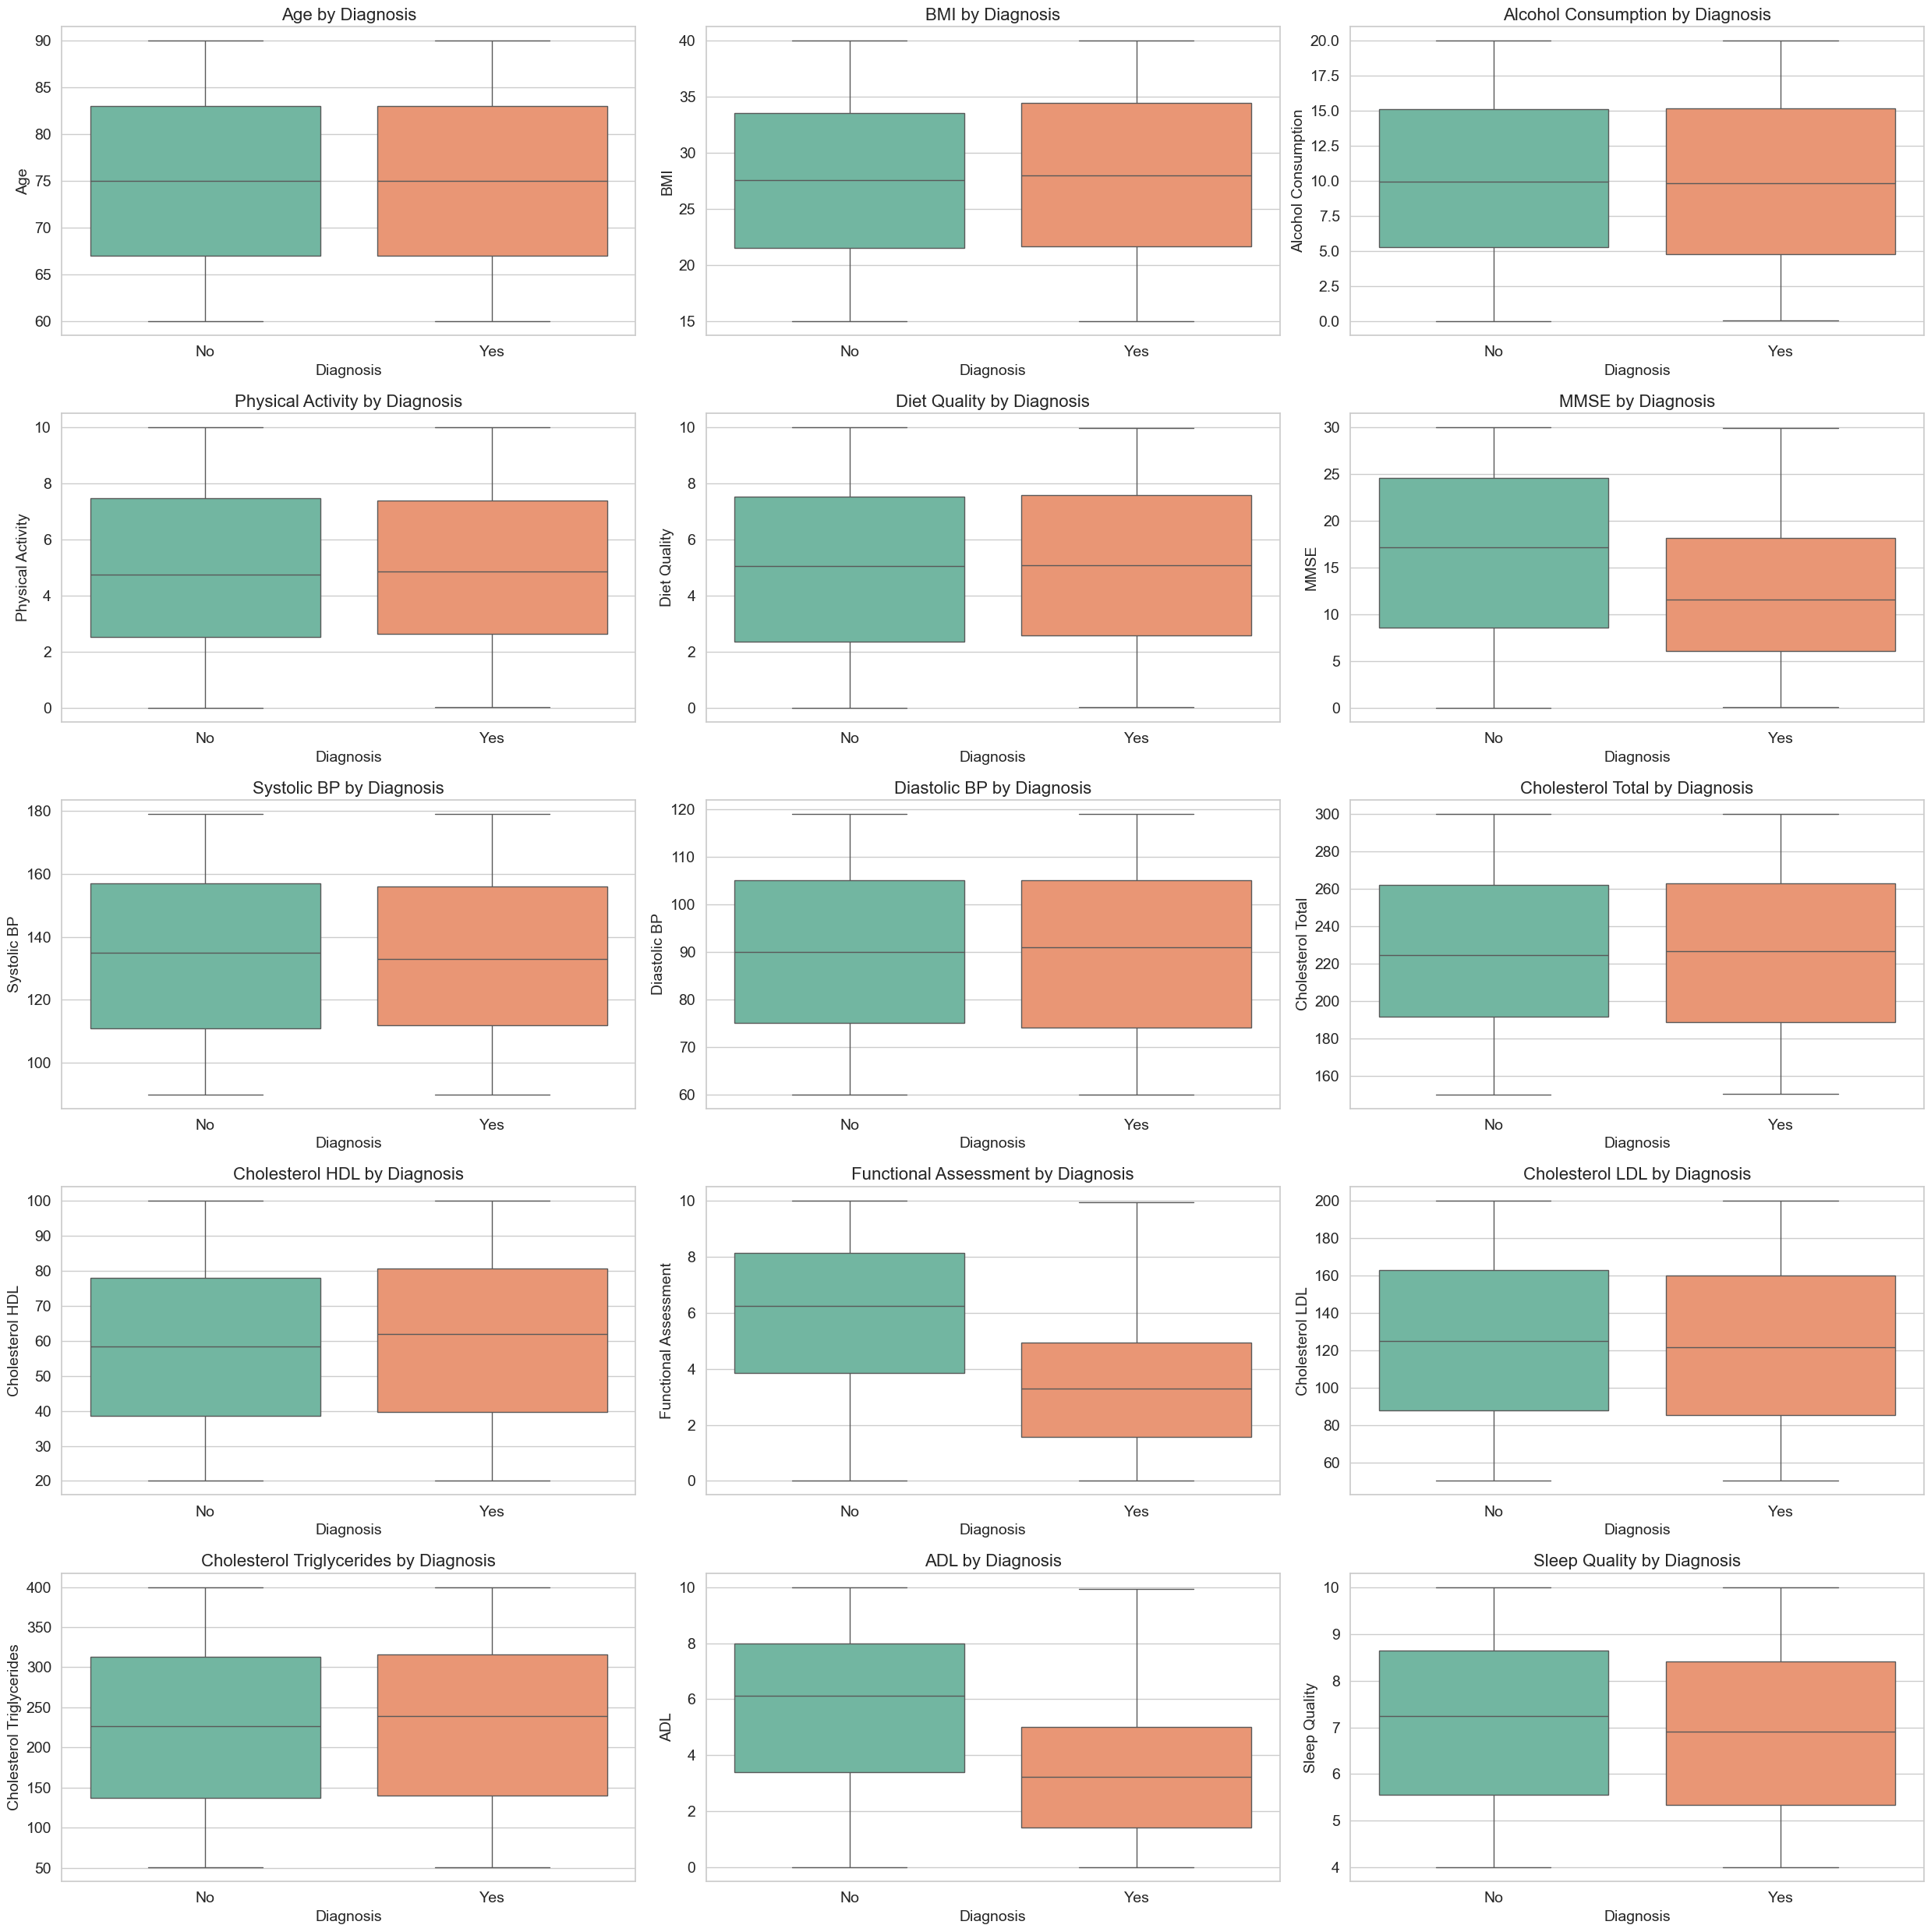

In [564]:
# Setup grid dimensions and figure
fig, axes = plt.subplots(continous_rows,continuous_cols, figsize=(25, 25))
axes = axes.flatten()

# Plot box plots for each continuous variable by Diagnosis
for i, var in enumerate(continuous_vars):
    sns.boxplot(x=data_with_dummies['Diagnosis'], y=data_with_dummies[var], ax=axes[i],
                hue = data_with_dummies['Diagnosis'],legend =False,
                palette="Set2")

    # Create pretty version of column using user function
    pretty_col = format_variable(var)

    # Set y-ticks explicitly to [0, 1] corresponding to Diagnosis (to avoid warning)
    axes[i].set_xticks([0, 1])

    # Map x-tick labels to corresponding diagnosis labels
    axes[i].set_xticklabels(diagnosis_labels)

    # Set title and labels
    axes[i].set_title(f'{pretty_col} by Diagnosis', fontsize =16)
    axes[i].set_xlabel('Diagnosis', fontsize = 14)
    axes[i].set_ylabel(pretty_col, fontsize = 14)
    axes[i].tick_params(axis='both', which='major', labelsize=14)
    

plt.tight_layout()
# Save the figure 
plt.savefig('results/box_plots_by_diagnosis.png', dpi=300) 
plt.show()


##### Histograms with KDE line: Overall

Another way to look at distributions is to use Histograms with a KDE line overlaid.

##### Histograms with KDE line: By Diagnosis

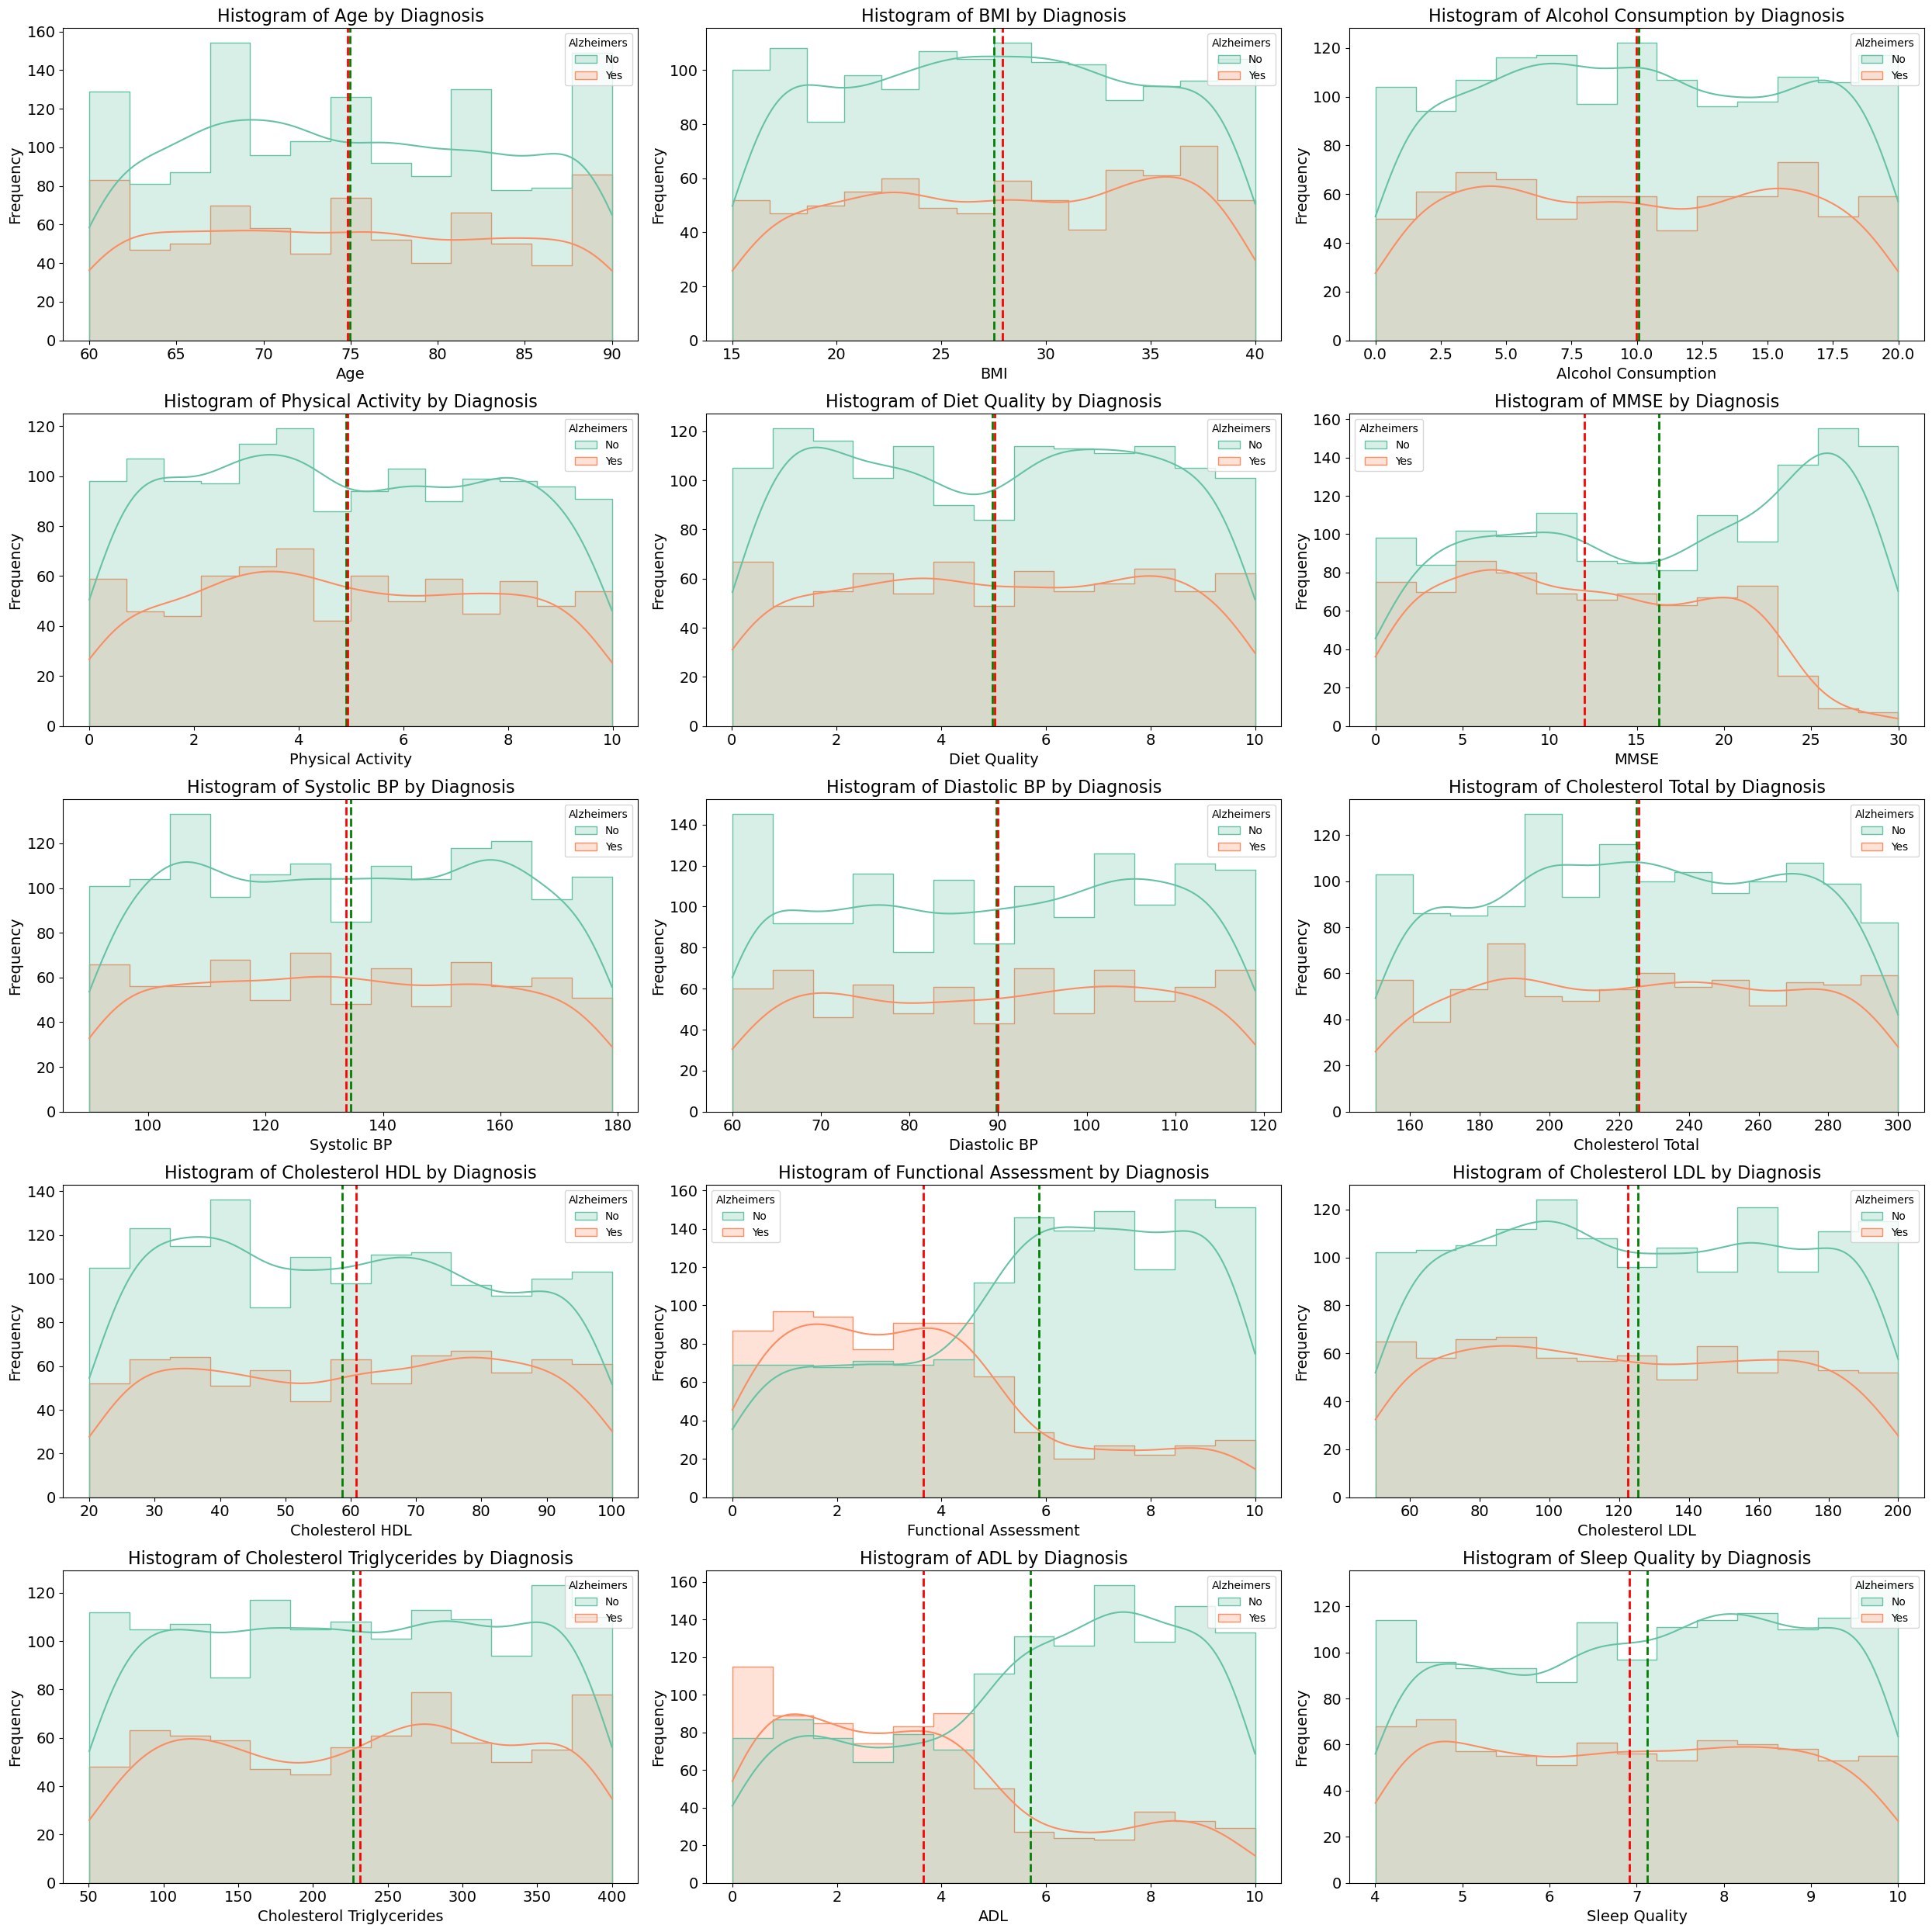

In [94]:
# Plot histograms by Diagnosis
fig, axes = plt.subplots(nrows=continous_rows, ncols=continuous_cols, figsize=(25, 25))
axes = axes.flatten()

data_with_dummies['Alzheimers'] = data_with_dummies['Diagnosis'].map(categorical_mappings['Diagnosis'])

# Loop over continuous variables to make plot
for i, col in enumerate(continuous_vars):
    # Add element "step" to make it easier to see differences in distributions between diagnosis groups
    sns.histplot(data=data_with_dummies, x=col, hue='Alzheimers', kde=True, ax=axes[i], palette="Set2", element="step")

    # Create pretty version of column using user function
    pretty_col = format_variable(col)

    # Add vertical lines for the means
    mean_not_diagnosed = data_with_dummies[continuous_vars][data_with_dummies['Diagnosis'] == 0][col].mean()
    mean_diagnosed = data_with_dummies[continuous_vars][data_with_dummies['Diagnosis'] == 1][col].mean()
    axes[i].axvline(mean_not_diagnosed, color='green', linestyle='--', linewidth=2, label=f'Mean Not Diagnosed: {mean_not_diagnosed:.2f}')
    axes[i].axvline(mean_diagnosed, color='red', linestyle='--', linewidth=2, label=f'Mean Diagnosed: {mean_diagnosed:.2f}')

    # Set title using this pretty col
    axes[i].set_title(f'Histogram of {pretty_col} by Diagnosis', fontsize = 16)
    axes[i].tick_params(axis='both', which='major', labelsize = 14)
    axes[i].set_xlabel(pretty_col, fontsize = 14)
    axes[i].set_ylabel('Frequency', fontsize = 14)

plt.tight_layout()

plt.show()


#### Count Plots for Categorical Variables

In [122]:
# Set number of rows and columns for figures
cols_cat = 3  # Number of columns in the grid
rows_cat = 6  # Number of rows

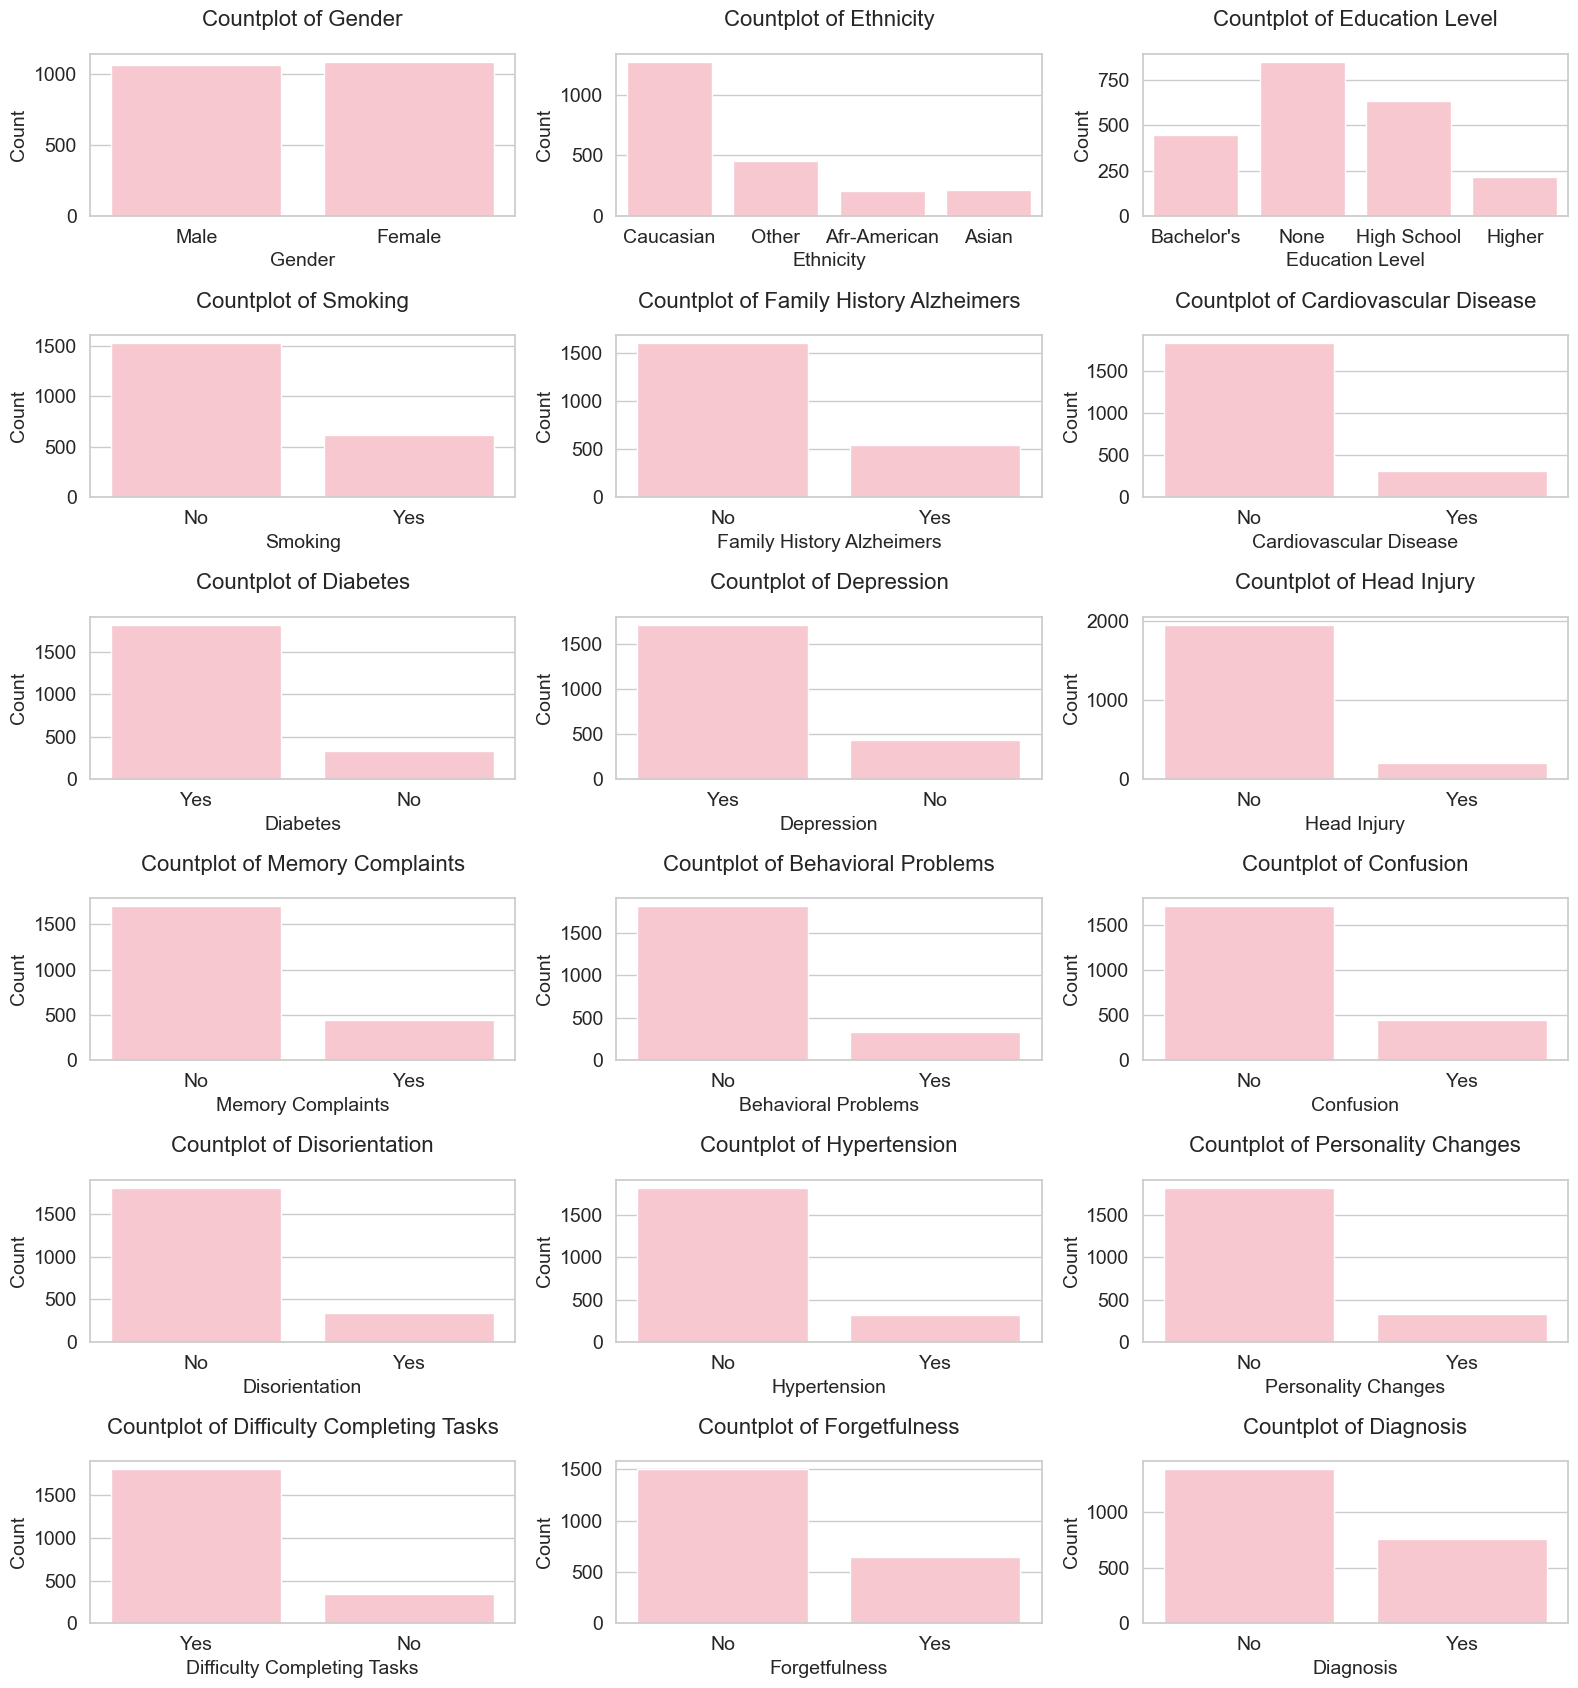

In [568]:
# Create subplots for each categorical variable
fig_cat, axes_cat = plt.subplots(rows_cat, cols_cat, figsize=(16, 18))
axes_cat = axes_cat.flatten()

# Plot count plots for each categorical variable
for i, col in enumerate(categorical_vars):
    sns.countplot(x=data_with_dummies[col], ax=axes_cat[i], color='pink')

    # Create pretty version of column using user function
    pretty_col = format_variable(col)

    # Set titles and labels
    axes_cat[i].set_title(f'Countplot of {pretty_col}', pad=20, fontsize = 16)
    axes_cat[i].set_xlabel(pretty_col, fontsize = 14)
    axes_cat[i].set_ylabel('Count', fontsize = 14)

    # Set up category labels for x-axis using categorical mappings dictionary
    x_ticks = data_with_dummies[col].unique()
    labels = [categorical_mappings[col][tick] for tick in x_ticks]

    # Set x-tick labels to the mapped category labels
    axes_cat[i].set_xticks(range(len(x_ticks)))  # Set the x-ticks to match the unique values' positions
    axes_cat[i].set_xticklabels(labels) # Map x-tick labels to corresponding category labels
    axes_cat[i].tick_params(axis='both', which='major', labelsize=14)

# Adjust layout to avoid overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save the figure 
plt.savefig('results/count_plot.png', dpi=300) 

# Show the plot
plt.show()


##### By Diagnosis

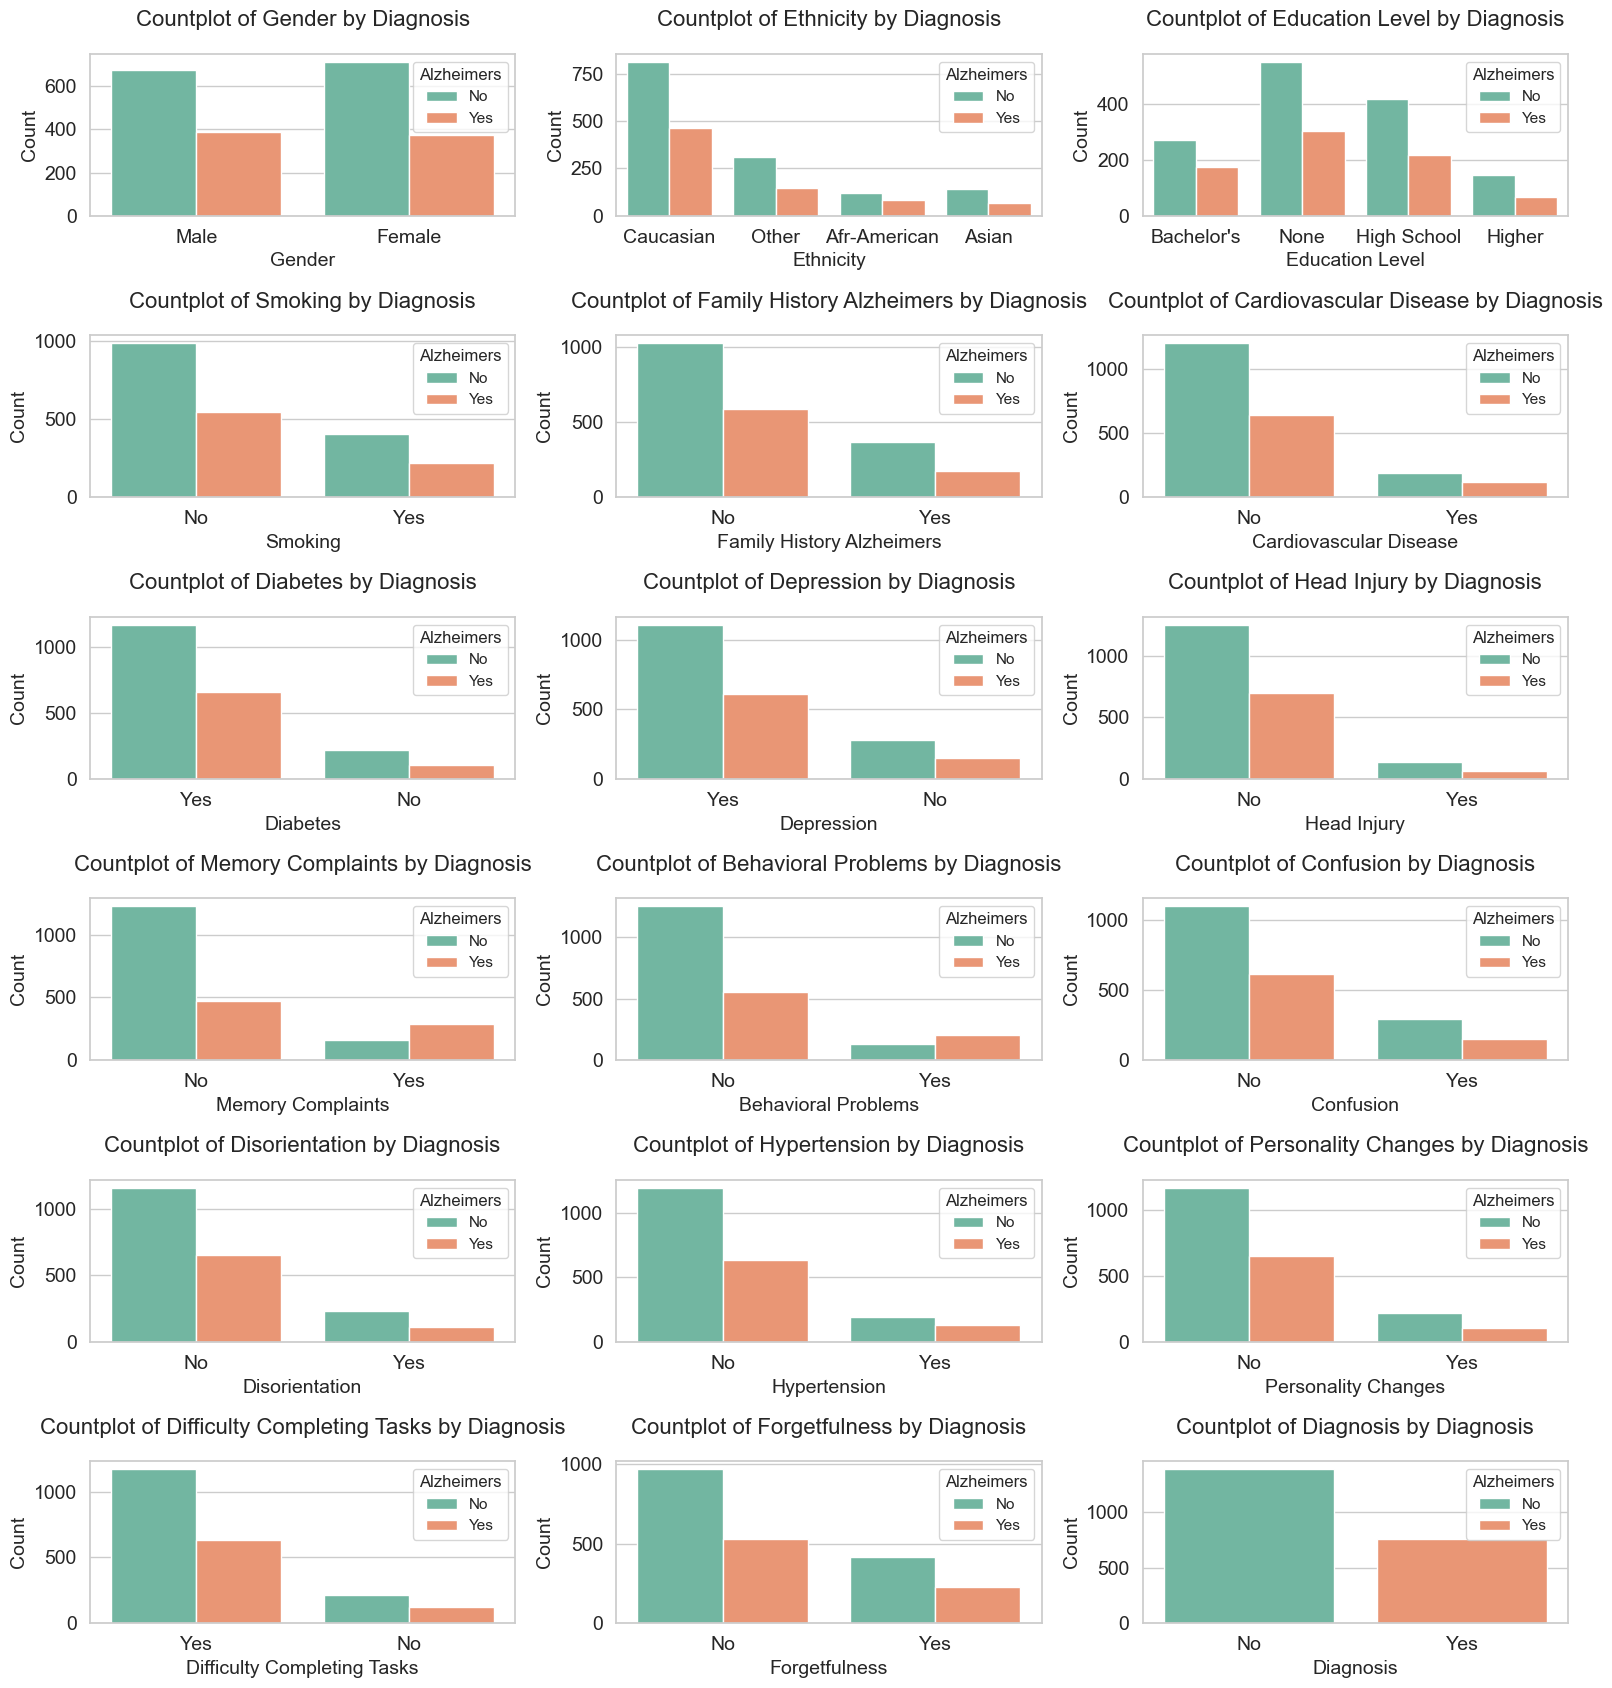

In [569]:
# Create subplots for each categorical variable
fig_cat, axes_cat = plt.subplots(rows_cat, cols_cat, figsize=(16, 18))
axes_cat = axes_cat.flatten()

# Plot count plots for each categorical variable
for i, col in enumerate(categorical_vars):
    sns.countplot(x=data_with_dummies[col], hue=data_with_dummies['Alzheimers'], palette='Set2', ax=axes_cat[i])

    # Create pretty version of column using user function
    pretty_col = format_variable(col)

    # Set title and axis labels
    axes_cat[i].set_title(f'Countplot of {pretty_col} by Diagnosis', pad=20, fontsize =16)
    axes_cat[i].set_xlabel(pretty_col, fontsize =14)
    axes_cat[i].set_ylabel('Count', fontsize =14)

    # Set up category labels for x-axis using categorical mappings dictionary
    x_ticks = data_with_dummies[col].unique()
    labels = [categorical_mappings[col][tick] for tick in x_ticks]

    # Set x-tick labels to the mapped category labels
    axes_cat[i].set_xticks(range(len(x_ticks)))  # Set the x-ticks to match the unique values' positions
    axes_cat[i].set_xticklabels(labels)  # Map x-tick labels to corresponding category labels
    axes_cat[i].tick_params(axis='both', which='major', labelsize=14)

# Adjust layout to avoid overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save the figure 
plt.savefig('results/count_plot_by_diagnosis.png', dpi=300) 

# Show the plot
plt.show()


## Exploratory Analyses

The following table shows which analyses you can run depending on the data you have.

| **Data Type**               | **Normality**          | **Statistical Techniques**                                                                                       |
|-----------------------------|------------------------|-------------------------------------------------------------------------------------------------------------------|
| **Continuous Data**          | **Normal**             | T-tests, ANOVA, Pearson Correlation, Linear Regression                                                            |
|                             | **Not Normal**         | Mann-Whitney U Test, Kruskal-Wallis Test, Spearman Correlation, Non-Parametric Regression                         |
| **Categorical Data**         | N/A                    | Chi-Square Test, Fisher’s Exact Test, Logistic Regression, Cross Tabulation, Frequency Analysis                   |
| **Encoded Categorical Data** | N/A                    | Logistic Regression, Chi-Square Test, Cluster Analysis, PCA                                                       |

We ran the following:
- Spearman rank to examine relationships between continuous variables.
- Mann-Whitney U Test to compare continuous variables between diagnosis groups.
- Chi-Square Test to examine relationships between all categorical variables.


In [570]:
# Remove Alzheimer's column before any analysis
data_with_dummies = data_with_dummies.drop('Alzheimers', axis = 1)
data_with_dummies.columns

Index(['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP',
       'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'Ethnicity_0', 'Ethnicity_1',
       'Ethnicity_2', 'Ethnicity_3'],
      dtype='object')

### Checking Data Normality for Continuous Data

We ran normality test and plotted QQ plots to see which techniques to use for exploratory analysis. The data isn't normal which means we need to use a non-parametric test to assess whether each continuous variable differs between the two diagnosis groups (i.e., mann-whitney).

In [571]:
# Perform Shapiro-Wilk test for normality check
for var in continuous_vars:
    data_var = data_with_dummies[continuous_vars][var].dropna()

    if len(data_var) > 3:  # Shapiro-Wilk requires at least 3 data points
        stat, p_value = shapiro(data_var)
        print(f'Variable: {var}')
        print(f'Statistic: {stat:.4f}, p-value: {p_value:.4f}')

        if p_value > 0.05:
            print('Data is normally distributed (fail to reject H0)')
        else:
            print('Data is not normally distributed (reject H0)')
        print('---')


Variable: Age
Statistic: 0.9523, p-value: 0.0000
Data is not normally distributed (reject H0)
---
Variable: BMI
Statistic: 0.9558, p-value: 0.0000
Data is not normally distributed (reject H0)
---
Variable: AlcoholConsumption
Statistic: 0.9545, p-value: 0.0000
Data is not normally distributed (reject H0)
---
Variable: PhysicalActivity
Statistic: 0.9567, p-value: 0.0000
Data is not normally distributed (reject H0)
---
Variable: DietQuality
Statistic: 0.9522, p-value: 0.0000
Data is not normally distributed (reject H0)
---
Variable: MMSE
Statistic: 0.9525, p-value: 0.0000
Data is not normally distributed (reject H0)
---
Variable: SystolicBP
Statistic: 0.9551, p-value: 0.0000
Data is not normally distributed (reject H0)
---
Variable: DiastolicBP
Statistic: 0.9494, p-value: 0.0000
Data is not normally distributed (reject H0)
---
Variable: CholesterolTotal
Statistic: 0.9590, p-value: 0.0000
Data is not normally distributed (reject H0)
---
Variable: CholesterolHDL
Statistic: 0.9527, p-value: 

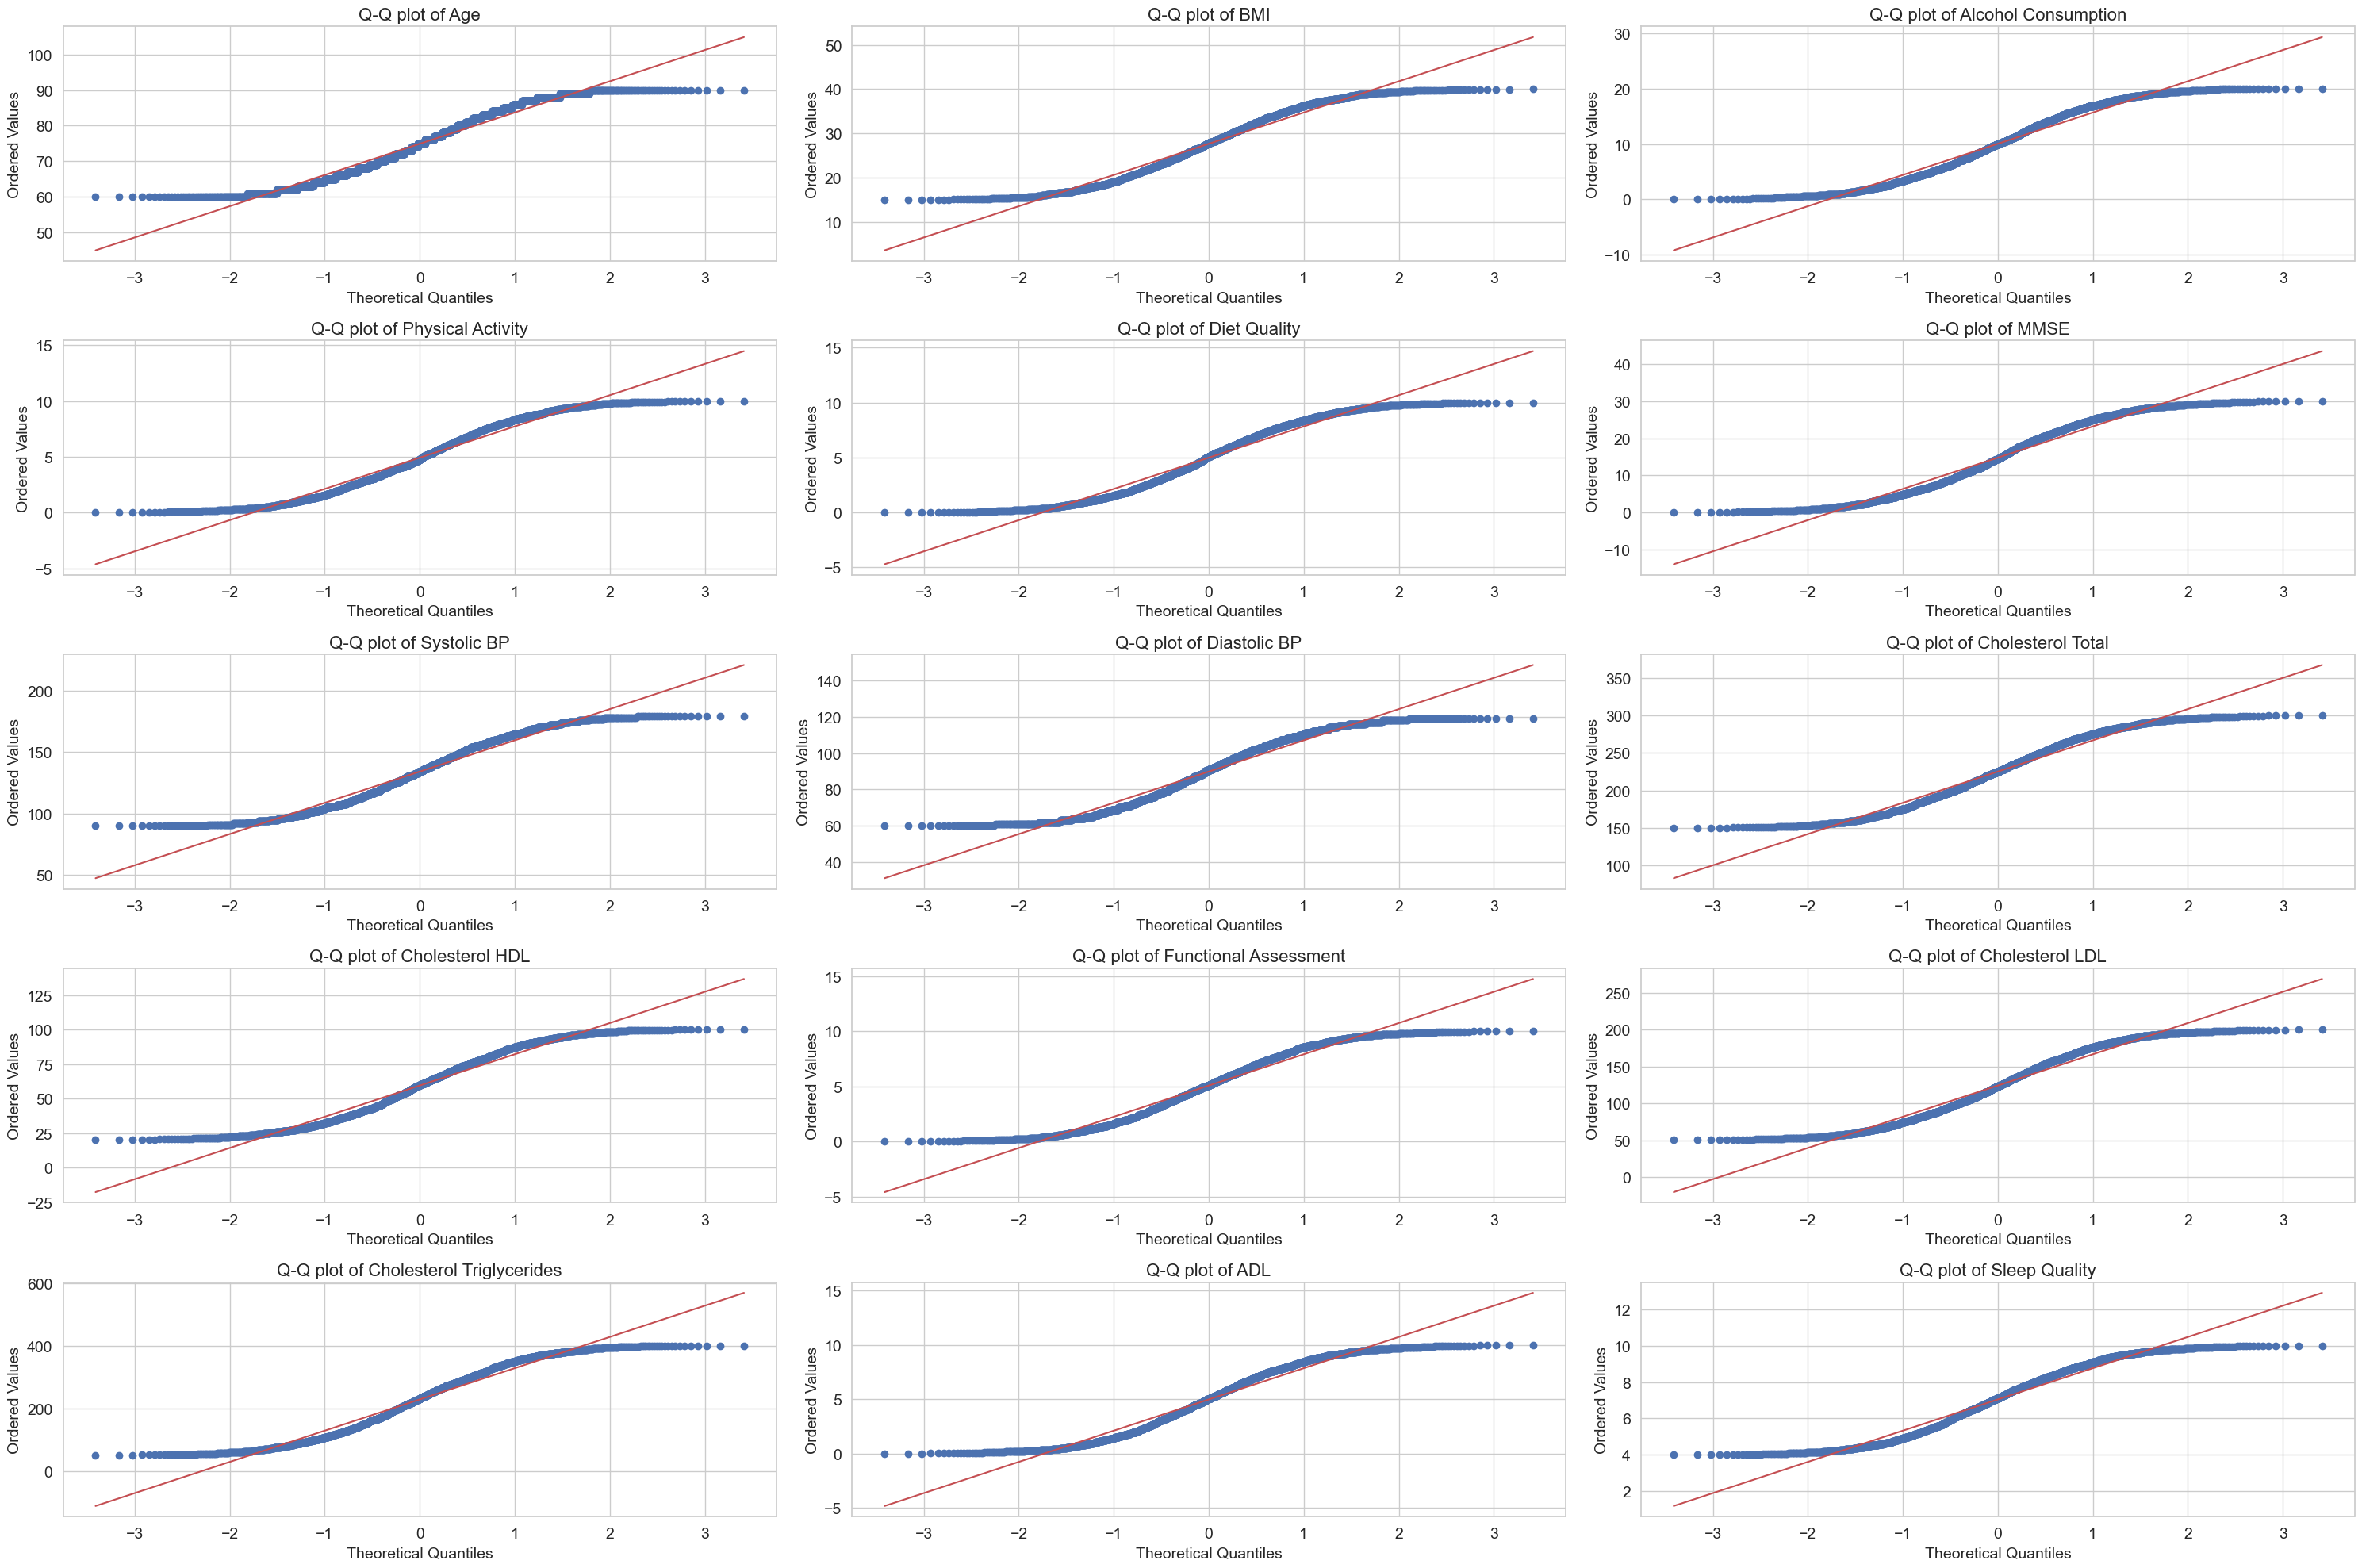

In [572]:
# Define the number of rows and columns in the grid
rows = 5  # Adjust according to the number of variables
cols = 3  # Adjust according to the number of variables

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(30, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each continuous variable (excluding 'Diagnosis') and create a Q-Q plot
for i, var in enumerate(data_with_dummies[continuous_vars].columns):
    if var != 'Diagnosis':  # Exclude the 'Diagnosis' column
        stats.probplot(data_with_dummies[var], dist="norm", plot=axes[i])
        pretty_col = format_variable(var)
        axes[i].set_title(f'Q-Q plot of {pretty_col}', fontsize = 16)
        axes[i].set_xlabel('Theoretical Quantiles', fontsize = 14)
        axes[i].set_ylabel('Ordered Values', fontsize = 14)
        axes[i].tick_params(axis='both', which='major', labelsize=14)
        

# Adjust layout to avoid overlap
plt.tight_layout()

# Save the figure 
plt.savefig('results/qq_plot.png', dpi=300) 

# Show the plot
plt.show()


### Spearman rank

We ran spearman rank to explore associations between continuous variables and visualised using a heatmap. Spearman rank can be used with non-normal data.

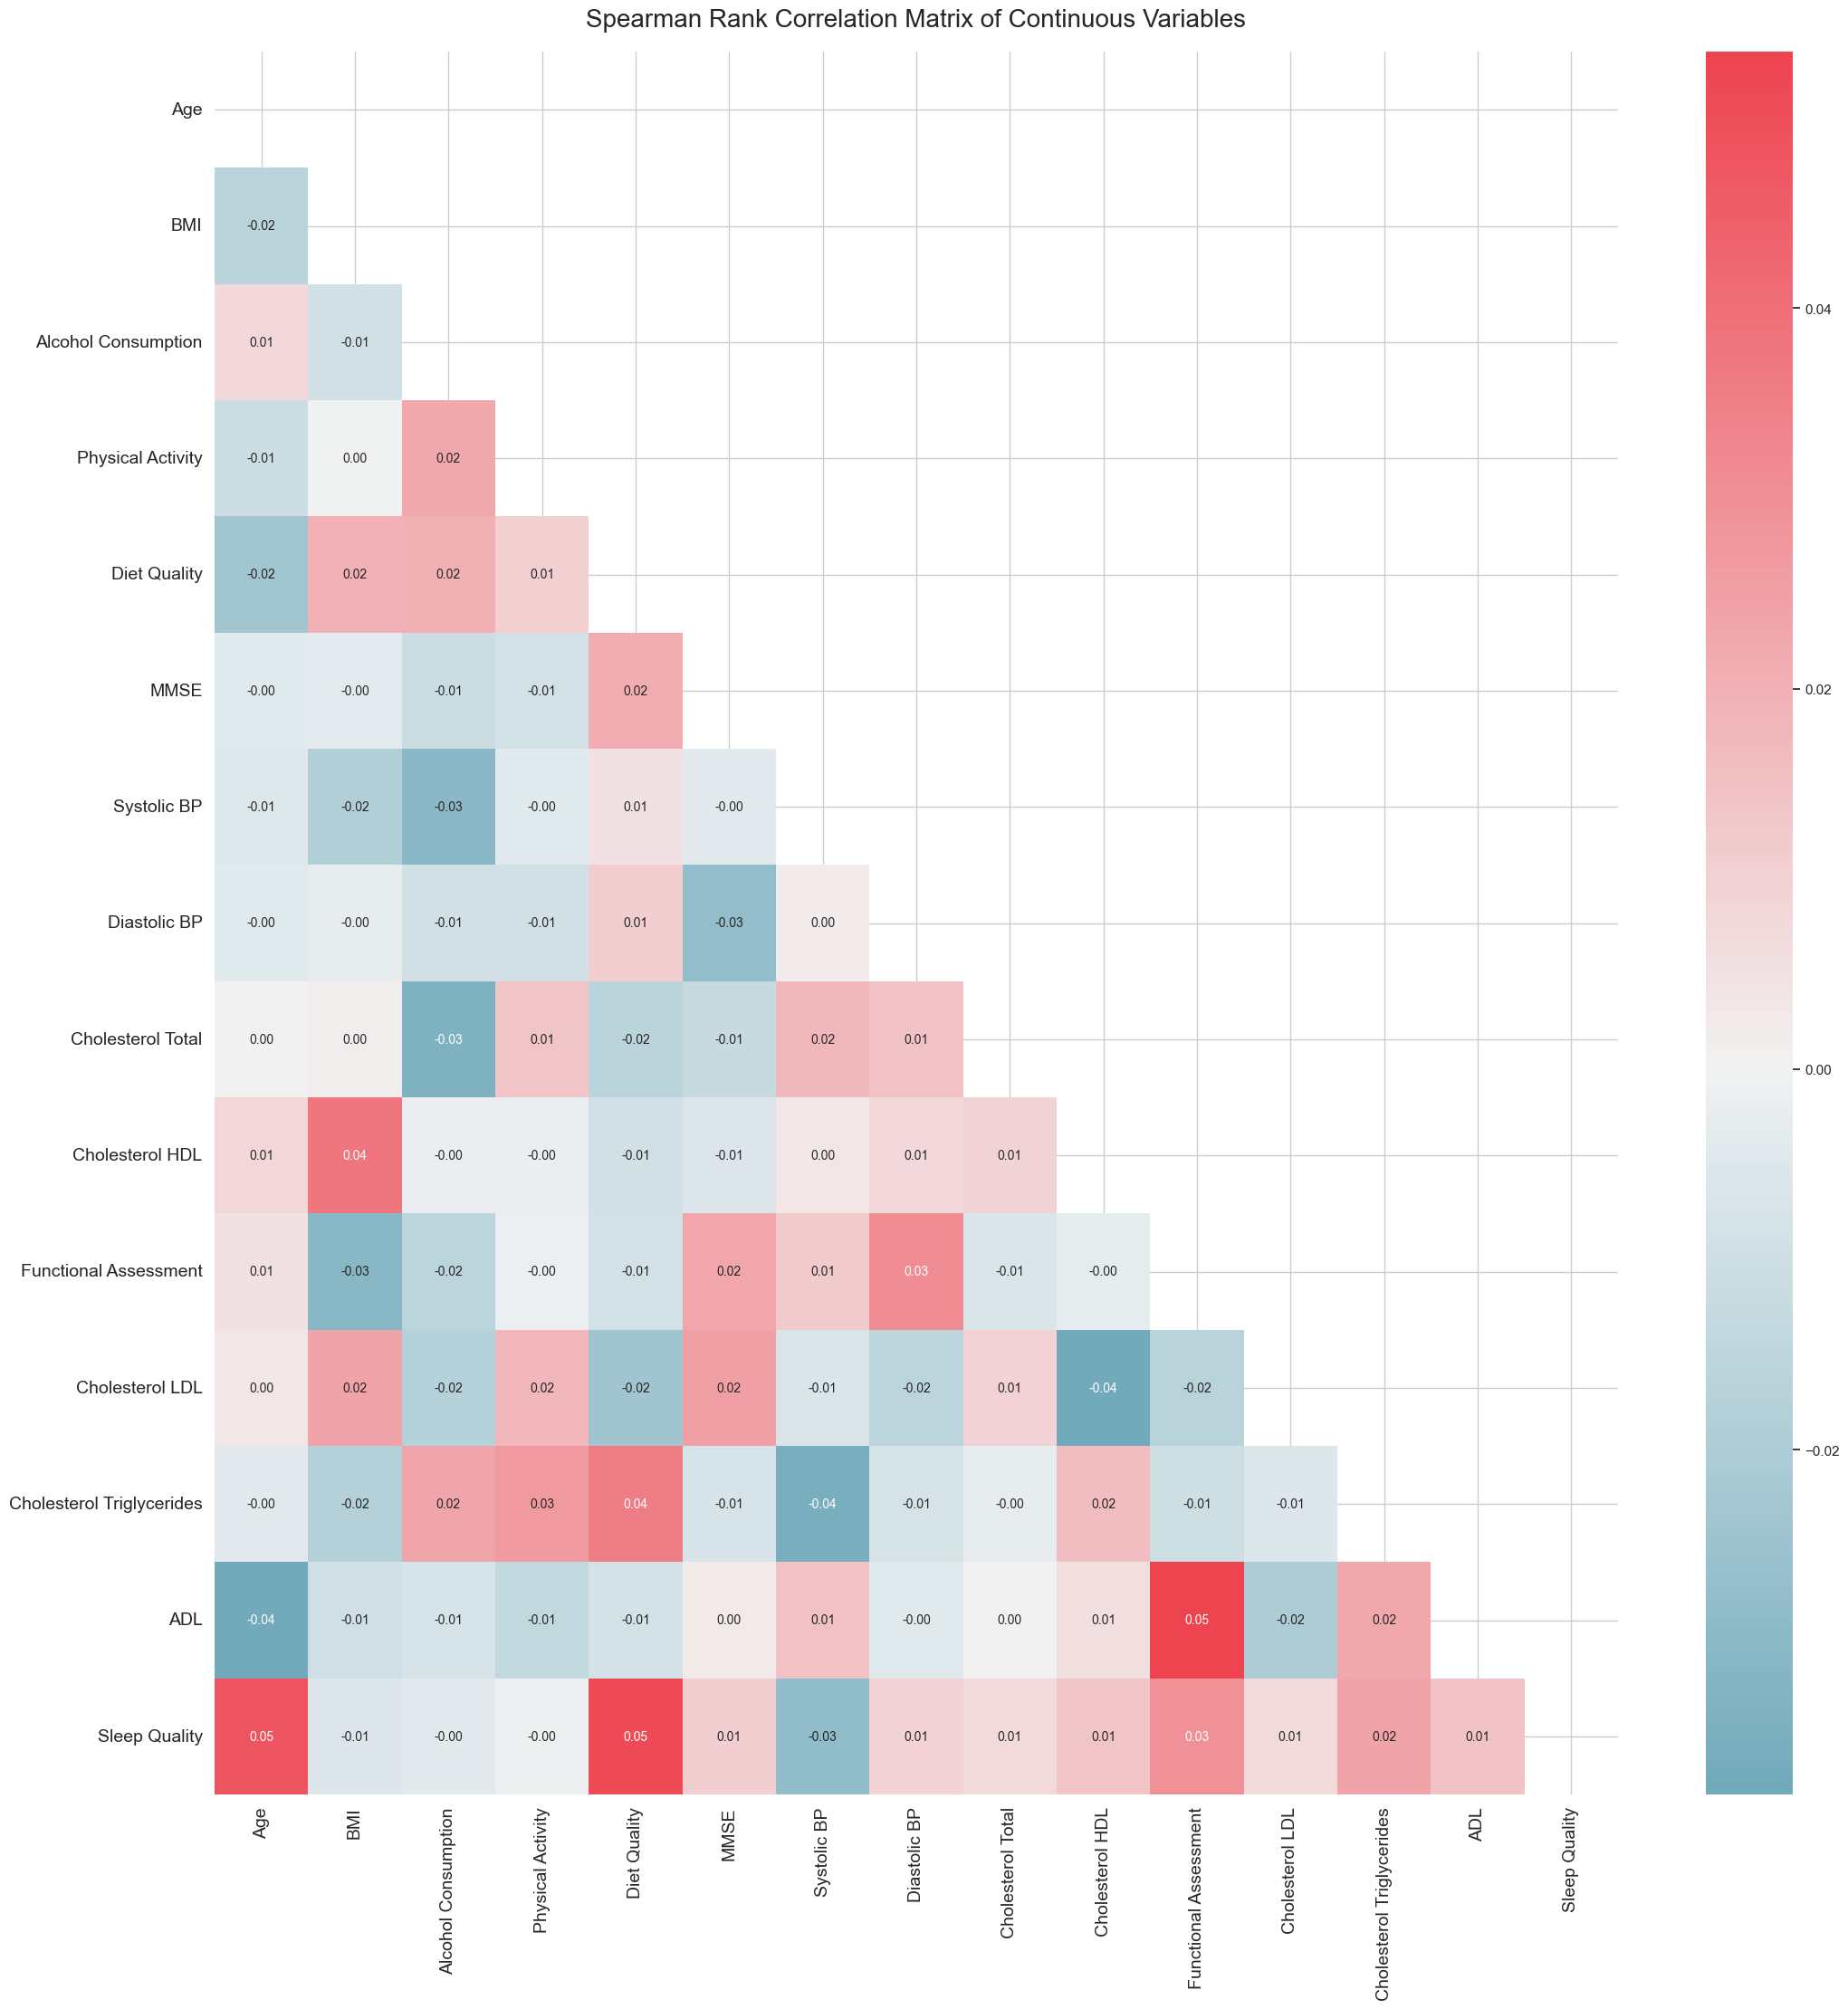

In [573]:
# Compute the correlation matrix for continuous variables
corrmat = data_with_dummies[continuous_vars].corr(method = "spearman")

# Update row and column names using the format variable function
formatted_index = [format_variable(col) for col in corrmat.index]
formatted_columns = [format_variable(col) for col in corrmat.columns]
corrmat.index = formatted_index
corrmat.columns = formatted_columns

# Create a mask for the upper triangle for better readability
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True

# Create a custom diverging color palette with reversed hues
custom_palette = sns.diverging_palette(220, 10, s=80, l=55, n=9, as_cmap=True)

# Plot the heatmap
plt.figure(figsize=(25, 25))
sns.heatmap(corrmat,annot=True, annot_kws={'fontsize':10},fmt=".2f",
            mask=mask,  # Apply the mask to hide the upper triangle
            cmap=custom_palette,  # Apply the custom color palette
            center=0)  # Center the colormap at 0

# Add a title to the heatmap
plt.title('Spearman Rank Correlation Matrix of Continuous Variables', fontsize=20, pad=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Save the figure 
plt.savefig('results/spearman_heatmap.png', dpi=300) 

plt.show()

### Mann-Whitney U Test

We ran Mann-Whitney U to compare continuous variables between diagnosis groups.

It is a non-parametric statistical test used to determine whether there is a significant difference between the distributions of two independent samples. In this case, the two samples are 'Diagnosis' and 'No Diagnosis'. Using non-parametric because of non-normality.

No significant difference between groups for Age (fail to reject H0)
--------------------------------------------------
No significant difference between groups for BMI (fail to reject H0)
--------------------------------------------------
No significant difference between groups for AlcoholConsumption (fail to reject H0)
--------------------------------------------------
No significant difference between groups for PhysicalActivity (fail to reject H0)
--------------------------------------------------
No significant difference between groups for DietQuality (fail to reject H0)
--------------------------------------------------
Mann-Whitney U Test for MMSE: Statistics=678416.000, p=0.000
Significant difference between groups for MMSE (reject H0)
--------------------------------------------------
No significant difference between groups for SystolicBP (fail to reject H0)
--------------------------------------------------
No significant difference between groups for DiastolicBP (fail to 

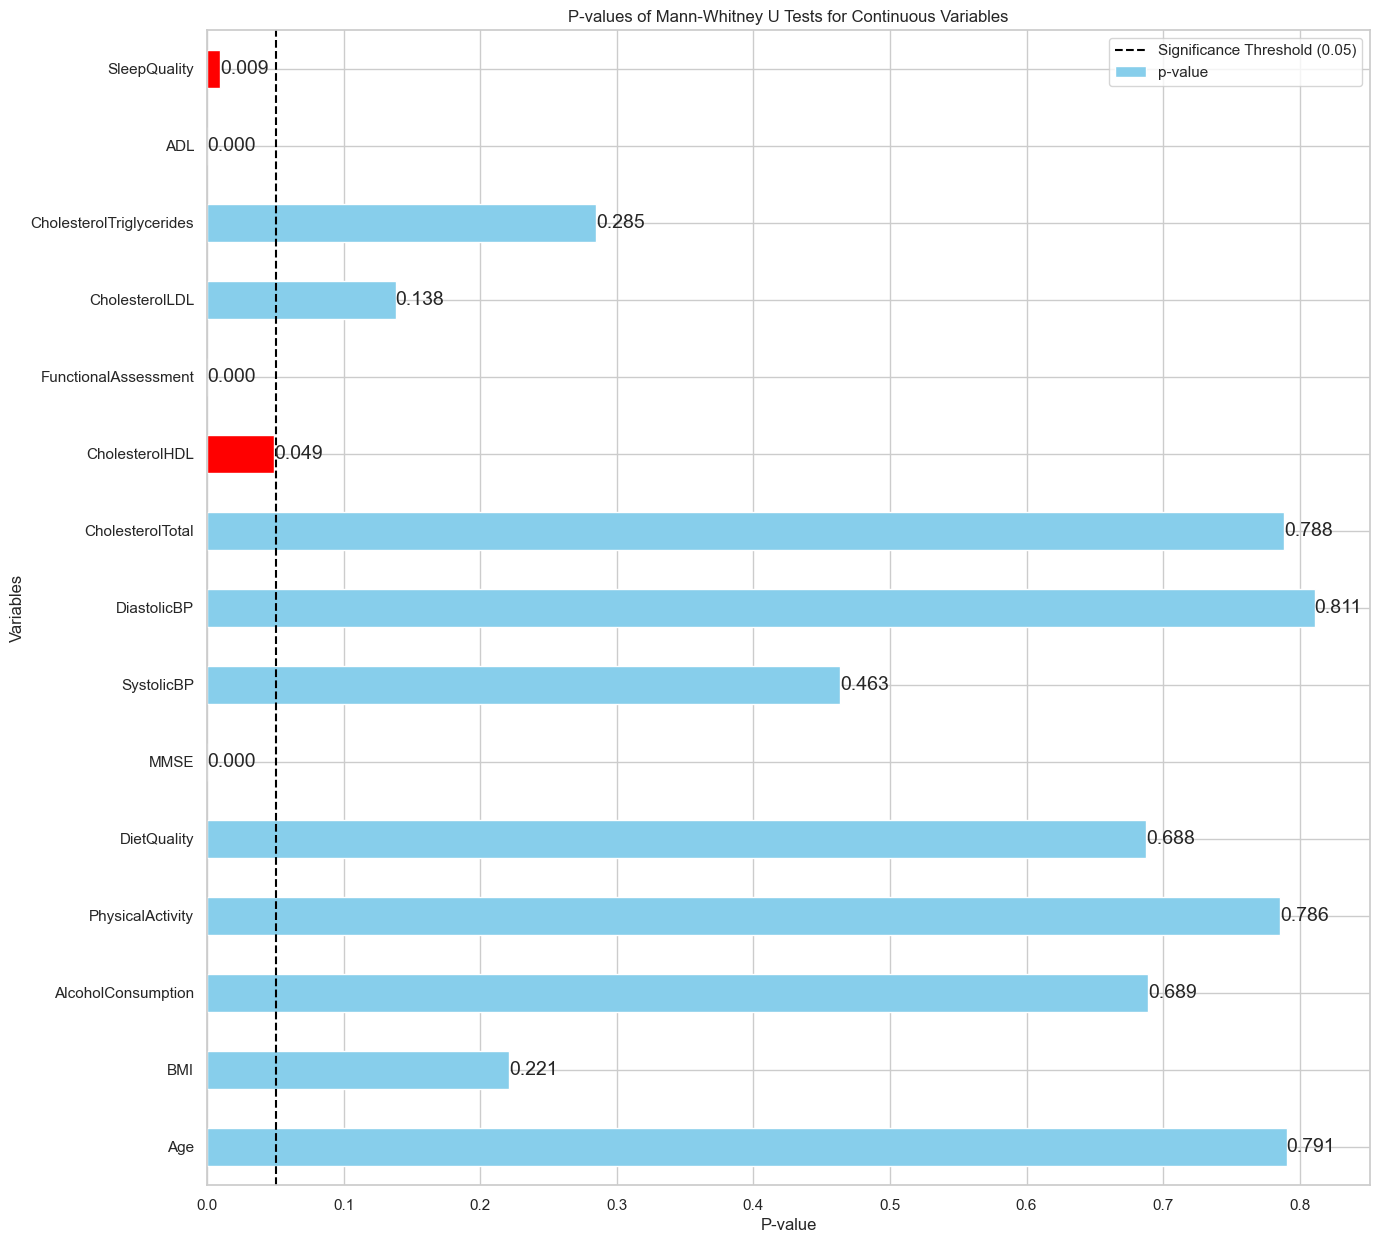

In [574]:
# Initialize a dictionary to store the test results
mw_results = {}

# Perform Mann-Whitney U test for each continuous variable
for col in continuous_vars:
    # Extract the two groups based on the Diagnosis
    group1 = data_with_dummies[data_with_dummies['Diagnosis'] == 0][col].dropna()
    group2 = data_with_dummies[data_with_dummies['Diagnosis'] == 1][col].dropna()

    # Perform the Mann-Whitney U test
    stat, p = stats.mannwhitneyu(group1, group2)

    # Store the results in the dictionary
    mw_results[col] = p

    # Print the results
    if p < 0.05:
        print(f'Mann-Whitney U Test for {col}: Statistics={stat:.3f}, p={p:.3f}')
        print(f'Significant difference between groups for {col} (reject H0)')
    else:
        ""
        print(f'No significant difference between groups for {col} (fail to reject H0)')
    print('-' * 50)

# Convert the results to a DataFrame for easier plotting
mw_results_df = pd.DataFrame.from_dict(mw_results, orient='index', columns=['p-value'])

# Plot the p-values
plt.figure(figsize=(15, 15))
bars = mw_results_df['p-value'].plot(kind='barh', color=mw_results_df['p-value'].apply(lambda x: 'red' if x < 0.05 else 'skyblue'))

plt.axvline(0.05, color='black', linestyle='--', label='Significance Threshold (0.05)')
plt.title('P-values of Mann-Whitney U Tests for Continuous Variables')
plt.xlabel('P-value')
plt.ylabel('Variables')
plt.legend()

# Add p-value annotations next to each bar
for index, value in enumerate(mw_results_df['p-value']):
    plt.text(value, index, f'{value:.3f}', va='center', ha='left')

# Save the figure 
plt.savefig('results/mannWhitney_bar.png', dpi=300)

plt.show()


### Chi-Square Test

It is a statistical test used to determine whether there is a significant association between two categorical variables.

We first used it to visualise associations between all categorical variables, including 'Diagnosis'. We then use it to 

In [575]:
# Update one-hot encoded ethnicity variables according to their label
data_with_dummies = data_with_dummies.rename(columns={'Ethnicity_0': 'Caucasian', 
                                                      'Ethnicity_1': 'African American',
                                                     'Ethnicity_2': 'Asian',
                                                     'Ethnicity_3': 'Other Ethnicity'})

# Drop ethnicity
data_with_dummies = data_with_dummies.drop('Ethnicity',axis = 1)

In [576]:
# Initialize dictionary to store p-values for Diagnosis associations (for bar plot below)
p_values = {}

# Identify all categorical variables for looping over
chi_vars = data_with_dummies.select_dtypes(include=['category']).columns.tolist()

# Initialize a DataFrame for the chi-square p-value matrix (for heatmap)
chisqmatrix = pd.DataFrame(columns=chi_vars, index=chi_vars)

# Create a mask for the upper triangle (for heatmap)
mask = np.zeros_like(chisqmatrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Initialize a set to keep track of processed pairs for printing
# Will prevent results being printed twice
processed_pairs_printed = set()

# Loop through all pairs of variables (heatmap)
for i, icol in enumerate(chi_vars):
    for j, jcol in enumerate(chi_vars):

        if i == j:
            chisqmatrix.iloc[i, j] = 0  # Assign 0 to the diagonal
        else:
            # Create cross tab (contingency table) and calculate chi 2
            mycrosstab = pd.crosstab(data_with_dummies[icol], data_with_dummies[jcol])
            if mycrosstab.size > 0:
                chi2, p, dof, expected = stats.chi2_contingency(mycrosstab)
                chisqmatrix.iloc[i, j] = p  # Assign p-value
                
                # Collect p-values for 'Diagnosis' associations for the bar chart
                if (icol == 'Diagnosis' or jcol == 'Diagnosis') and i != j:
                    var = icol if jcol == 'Diagnosis' else jcol
                    p_values[var] = p
                    # Only print result if pair of cols hasn't been printed yet
                    if p < .05 and (icol, jcol) not in processed_pairs_printed and (jcol, icol) not in processed_pairs_printed:
                        print(f'Chi-Square Test of {icol} with {jcol} is significant: Statistics={chi2:.2f}, p={p:.3f}')
                        processed_pairs_printed.add((icol, jcol))
                        processed_pairs_printed.add((jcol, icol))
            else:
                print(f'Chi-Square Test for {icol} with {jcol}: Skipped (empty contingency table)')

        processed_pairs.add((icol, jcol))


Chi-Square Test of MemoryComplaints with Diagnosis is significant: Statistics=200.62, p=0.000
Chi-Square Test of BehavioralProblems with Diagnosis is significant: Statistics=106.88, p=0.000


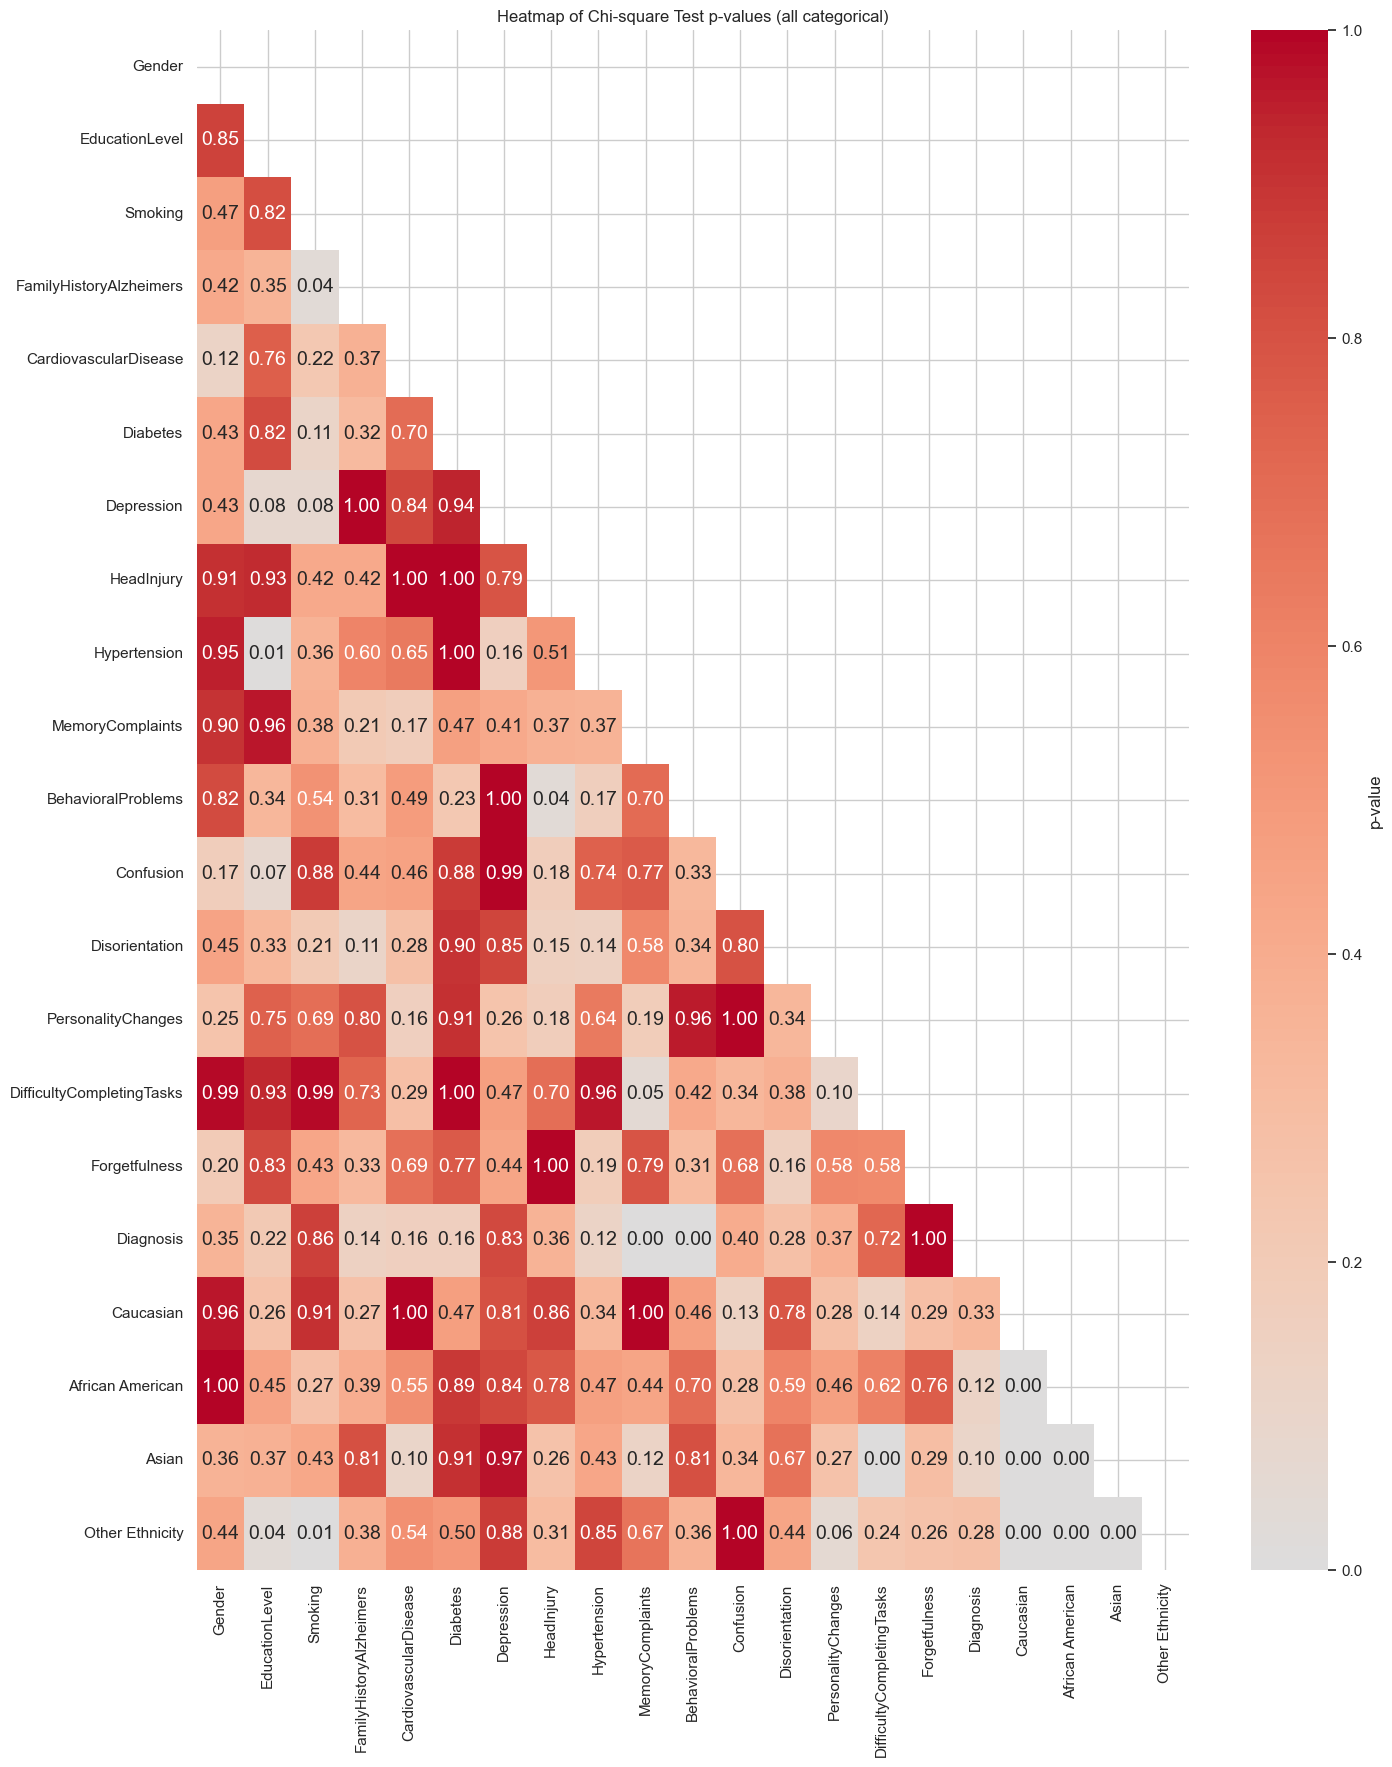

In [577]:
# Convert the chi-square matrix to numeric type for plotting
chisqmatrix = chisqmatrix.astype(float)

# Plot the heatmap (pairwise chi-square p-values including Diagnosis)
plt.figure(figsize=(16, 20))
sns.heatmap(chisqmatrix, annot=True, fmt=".2f", cbar_kws={'label': 'p-value'},
           mask=mask,  # Apply the mask to hide the upper triangle
           cmap='coolwarm',  # Use viridis for this plot
           center=0)
plt.title('Heatmap of Chi-square Test p-values (all categorical)')
# Save the figure 
plt.savefig('results/chiSquare_heatmap.png', dpi=300)
plt.show()

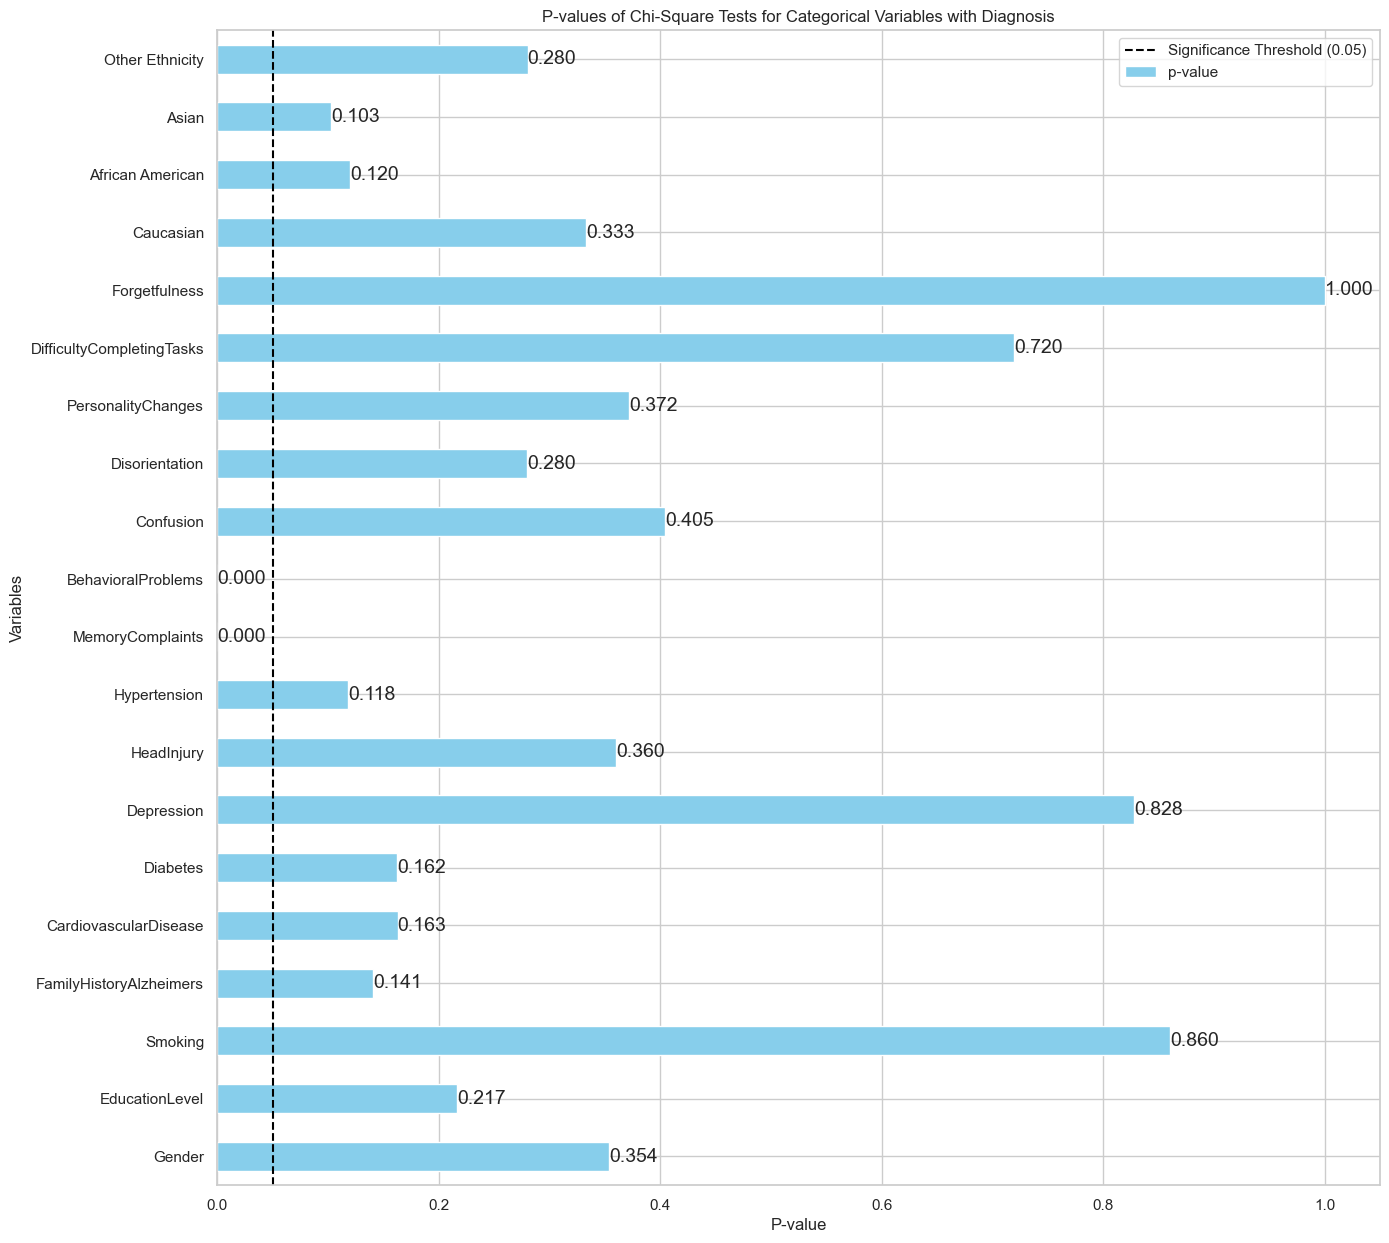

In [578]:
# Convert the p-values to a DataFrame for easier plotting
p_values_df = pd.DataFrame.from_dict(p_values, orient='index', columns=['p-value'])

# Plot the p-values as a bar chart (associations with Diagnosis)
plt.figure(figsize=(15, 15))
bars = p_values_df['p-value'].plot(kind='barh', color=p_values_df['p-value'].apply(lambda x: 'red' if x < 0.05 else 'skyblue'))

plt.axvline(0.05, color='black', linestyle='--', label='Significance Threshold (0.05)')
plt.title('P-values of Chi-Square Tests for Categorical Variables with Diagnosis')
plt.xlabel('P-value')
plt.ylabel('Variables')
plt.legend()

# Add p-value annotations next to each bar
for index, value in enumerate(p_values_df['p-value']):
    plt.text(value, index, f'{value:.3f}', va='center', ha='left')

# Save the figure 
plt.savefig('results/chiSquare_bar.png', dpi=300)

plt.show()

## Selecting input features for Machine learning

Our project employs a model-centric approach to enhance Alzheimer's disease classification.

We will train and evaluate six different algorithms using only the features identified as having significant relationships to Alzheimer’s diagnosis in our exploratory data analyses.

Performance assessment will be based on metrics such as **accuracy, recall,** and **F1-score** to guide the selection of the optimal model. We will also look at the ROC curve and AUC metric, alongside the confusion matrix.


In [579]:
# Verfying which features are in the data_with_dummies dataframe
data_with_dummies.columns

Index(['Age', 'Gender', 'EducationLevel', 'BMI', 'Smoking',
       'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP',
       'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'Caucasian', 'African American', 'Asian',
       'Other Ethnicity'],
      dtype='object')

### Y data

In [580]:
# Select y
y = data_with_dummies['Diagnosis']

### X data: predictors identified in univariate EDA

In [581]:
# Define lists of columns to drop
columns_to_drop = ['Diagnosis']

# Drop the specified columns from the main dataframe
X_all = data_with_dummies.loc[:, ~data_with_dummies.columns.isin(columns_to_drop)].copy()

# Checking columns after dropping: 'Diagnosis','Ethnicity', 'Alzheimers'
X_all.columns

Index(['Age', 'Gender', 'EducationLevel', 'BMI', 'Smoking',
       'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP',
       'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Caucasian', 'African American', 'Asian',
       'Other Ethnicity'],
      dtype='object')

In [582]:
# Define variables from univariate analysis
X_sig_vars = ['SleepQuality', 'ADL', 'CholesterolHDL', 'FunctionalAssessment',
              'MMSE','BehavioralProblems','MemoryComplaints']

# Create a DataFrame for variables identified through univariate analysis
X_sig = X_all[X_sig_vars].copy()
X_sig.columns

Index(['SleepQuality', 'ADL', 'CholesterolHDL', 'FunctionalAssessment', 'MMSE',
       'BehavioralProblems', 'MemoryComplaints'],
      dtype='object')

In [583]:
# Print the shapes of the DataFrames
print(f"Univariate relationship with Diagnosis in EDA: {X_sig.shape}")
print(f"Shape of ground truth labels (i.e., y) for each category: {y.shape}")

Univariate relationship with Diagnosis in EDA: (2149, 7)
Shape of ground truth labels (i.e., y) for each category: (2149,)


## Standardising and encoding data

In [584]:
# Get list of continuous variables in a given df
def get_continuous(df):
    return df.select_dtypes(include=[np.int64, np.float64]).columns.tolist()

# Get list of categorical variables in a given df
def get_categorical(df):
    return df.select_dtypes(include=['category']).columns.tolist()

In [585]:
# Function for transforming train_test splits independently
def transform_subset(X, y, scaler, o_enc, l_enc):

  # Select a list of continuous and categorical features
  continuous_cols = get_continuous(X)
  categorical_cols = get_categorical(X)

  # Apply transformations to each
  X[continuous_cols] = scaler.transform(X[continuous_cols])
  X[categorical_cols] = o_enc.transform(X[categorical_cols])
  y = l_enc.transform(y)

  # Return the transformed data without column headers in X
  return X.values, y

In [586]:
# Function to split data, fit and apply transforms to relevant subsets
def preprocess(data, y, test_size=0.3, random_state=50):

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=test_size, random_state=random_state)

    # Further split the test data into validation and test
    X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=random_state)

    # Initialize transformers
    scaler = StandardScaler()
    o_enc = OrdinalEncoder()
    l_enc = LabelEncoder()

    # Select a list of continuous and categorical features
    continuous_cols = get_continuous(X_train)
    categorical_cols = get_categorical(X_train)

    # Fit transformers on training data on training data only
    scaler.fit(X_train[continuous_cols])
    o_enc.fit(X_train[categorical_cols])
    l_enc.fit(y_train)

    # Transform training data
    X_train, y_train = transform_subset(X_train, y_train, scaler, o_enc, l_enc)

    # Transform validation data
    X_val, y_val  = transform_subset(X_val, y_val, scaler, o_enc, l_enc)

    # Transform test data
    X_test, y_test = transform_subset(X_test, y_test, scaler, o_enc, l_enc)

    # Returning splits
    return X_train, X_val, X_test, y_train, y_val, y_test


### Preprocess X and Y

In [518]:
# Preprocessing for the significant the predictors set
X_train_s, X_val_s, X_test_s ,y_train_s, y_val_s, y_test_s = preprocess(X_sig, y)

## Run and evaluate models

In [587]:
# Setting a random state for reproducibility of results
rs = 50

# Defining a dictionary of machine learning models to evaluate
# The dictionary keys are model names, and the values are the instantiated model objects
models = {
    # K-Nearest Neighbors Classifier
    'KNeighborsClassifier': KNeighborsClassifier(),

    # Support Vector Classifier with balanced class weights and probability estimates enabled
    'SVC': SVC(class_weight='balanced', random_state=rs, probability=True),

    # Logistic Regression with balanced class weights and L2 regularization
    'LogisticRegression': LogisticRegression(class_weight='balanced', penalty='l2', random_state=rs),

    # Decision Tree Classifier with balanced class weights and maximum depth of 5
    'DecisionTree Classifier': DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=rs),

    # Random Forest Classifier with balanced class weights
    'Random Forest Classifier': RandomForestClassifier(class_weight='balanced', random_state=rs),

    # Linear Support Vector Classifier with dual=False (use in case of a large number of features)
    'LinearSVC': LinearSVC(dual=False)
}


In [589]:
def evaluate_models(X_train, X_val, X_test, y_train, y_val, y_test, models):
    """
    Evaluate the performance of multiple machine learning models.

    Parameters:
    - X_train: Features for the training set.
    - X_test: Features for the test set.
    - y_train: Target labels for the training set.
    - y_test: Target labels for the test set.
    - models: Dictionary of machine learning models to evaluate.
    - k_folds: Number of folds for cross-validation (default: 5).

    Returns:
    - reports: Dictionary containing classification reports for each model,
               both for the training set (using cross-validation) and the test set.
    - test_results: Dictionary containing the true labels and predicted probabilities or labels
                    for each model on the test set.
    """

    # Initialize dictionaries to store classification reports and test results
    reports = {}
    test_results = {}

    # Iterate through the dictionary of models
    for name, ml_model in models.items():
        print(f'Current Machine Learning Model: {name}')

        # Fit the model on the entire training set
        ml_model.fit(X_train, y_train)

        # Evaluate the model on the validation set by making predictions
        predictions_val = ml_model.predict(X_val)

        # Evaluate the model on the test set by making predictions
        predictions_test = ml_model.predict(X_test)

        # If the model is not LinearSVC, store predicted probabilities
        if name != 'LinearSVC':
            y_pred = ml_model.predict_proba(X_test)
            test_results[name] = {'y_true': y_test, 'y_pred': y_pred}

        # If the model is LinearSVC, store predicted labels (as it doesn't support predict_proba)
        elif name == 'LinearSVC':
            test_results[name] = {'y_true': y_test, 'y_pred': predictions_test}

        # Generate a classification report for the validation set
        report_val = classification_report(y_val, predictions_val)
        
        # Generate a classification report for the test set
        report_test = classification_report(y_test, predictions_test)
        reports[name] = {'test_report': report_test}

        # Print the classification report for the current model
        print(f"Classification Report for Validation Set:\n{report_val}")
        
        # Print the classification report for the current model
        print(f"Classification Report for Test Set:\n{report_test}")
        print("-" * 52)

    # Return the classification reports and test results
    return reports, test_results


In [590]:
# Display the classification report for the test set for each model using significant predictors
sig_report, sig_y_pred  = evaluate_models(X_train_s, X_val_s, X_test_s, y_train_s, y_val_s, y_test_s, models)

Current Machine Learning Model: KNeighborsClassifier
Classification Report for Validation Set:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       223
           1       0.85      0.75      0.80        99

    accuracy                           0.88       322
   macro avg       0.87      0.84      0.86       322
weighted avg       0.88      0.88      0.88       322

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       222
           1       0.84      0.76      0.80       101

    accuracy                           0.88       323
   macro avg       0.87      0.85      0.86       323
weighted avg       0.88      0.88      0.88       323

----------------------------------------------------
Current Machine Learning Model: SVC
Classification Report for Validation Set:
              precision    recall  f1-score   support

           0       0.98      

## Visualise

In [598]:
def show_ROC(y_pred_dict):
    """
    Display ROC curves for multiple models.

    Parameters:
    - y_pred_dict: Dictionary where keys are model names and values are dictionaries containing
                   'y_true' (true labels) and 'y_pred' (predicted probabilities).

    This function generates subplots to visualize the ROC curves and AUC scores for each model.
    """

    # Create a grid of subplots (2 rows by 3 columns) for ROC curve visualization
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))

    # Flatten the axes array for easier iteration
    axes = axes.flatten()

    # Iterate through each model in the dictionary
    for i, model in enumerate(y_pred_dict):
        if model != 'LinearSVC':  # Skip LinearSVC as it does not support probability predictions

            # Extract true labels and predicted probabilities
            y_true = y_pred_dict[model]['y_true']
            y_scores = y_pred_dict[model]['y_pred'][:, 1]  # Probabilities for the positive class

            # Compute ROC curve values
            fpr, tpr, thresholds = roc_curve(y_true, y_scores)

            # Compute the Area Under the Curve (AUC)
            auc = roc_auc_score(y_true, y_scores)

            # Set the Seaborn style for better aesthetics
            sns.set(style="whitegrid")

            # Plot the ROC curve on the corresponding subplot
            axes[i].plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {auc:.2f})')
            axes[i].fill_between(fpr, tpr, color='floralwhite', alpha=0.5)
            axes[i].set_xlabel('False Positive Rate')
            axes[i].set_ylabel('True Positive Rate')
            axes[i].set_title(f'ROC Curve - {model}')
            axes[i].legend(loc='lower right')
            axes[i].grid(True)

    # Remove the last subplot (unused) if there are fewer than 6 models
    fig.delaxes(axes[5])

    # Adjust the layout to prevent overlap and display the plots
    plt.tight_layout()
    # Save the figure
    plt.savefig(f'results/ROC.png', dpi=300)
    plt.show()

In [599]:
def show_confusion(y_pred_dict):
    """
    Display confusion matrices for multiple models.

    Parameters:
    - y_pred_dict: Dictionary where keys are model names and values are dictionaries containing
                   'y_true' (true labels) and 'y_pred' (predicted probabilities or labels).

    This function generates subplots to visualize confusion matrices for each model.
    """

    # Update global font size for all plots
    plt.rcParams.update({'font.size': 14})

    # Create a grid of subplots (2 rows by 3 columns) for confusion matrix visualization
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))

    # Flatten the axes array to simplify iteration
    axes = axes.flatten()

    # Define class names for the confusion matrices
    class_names = ["0", "1"]

    # Iterate through each model in the dictionary
    for i, model in enumerate(y_pred_dict):

        # Check if the model is not LinearSVC (which does not support probability predictions)
        if model != 'LinearSVC':
            # Set threshold for classification and convert probabilities to binary predictions
            thres = 0.5
            target_predict = np.where(y_pred_dict[model]['y_pred'][:, 1] > thres, 1, 0)
        else:
            # For LinearSVC, use the predicted labels directly
            target_predict = y_pred_dict[model]['y_pred']

        # Extract the true labels
        target_actual = y_pred_dict[model]['y_true']

        # Compute the confusion matrix
        cfn = confusion_matrix(target_actual, target_predict)

        # Create and plot the confusion matrix
        disp = ConfusionMatrixDisplay(confusion_matrix=cfn, display_labels=class_names)
        disp.plot(ax=axes[i], include_values=True, cmap='viridis', xticks_rotation='horizontal')

        # Set the title for the subplot and disable grid lines
        axes[i].set_title(f'Confusion Matrix (Non-Normalized) {model}', fontsize=11)
        axes[i].grid(False)

    # Adjust the layout to prevent overlapping and display the plots
    plt.tight_layout()
    # Save the figure
    plt.savefig(f'results/confusion.png', dpi=300)
    plt.show()

### ROC curves

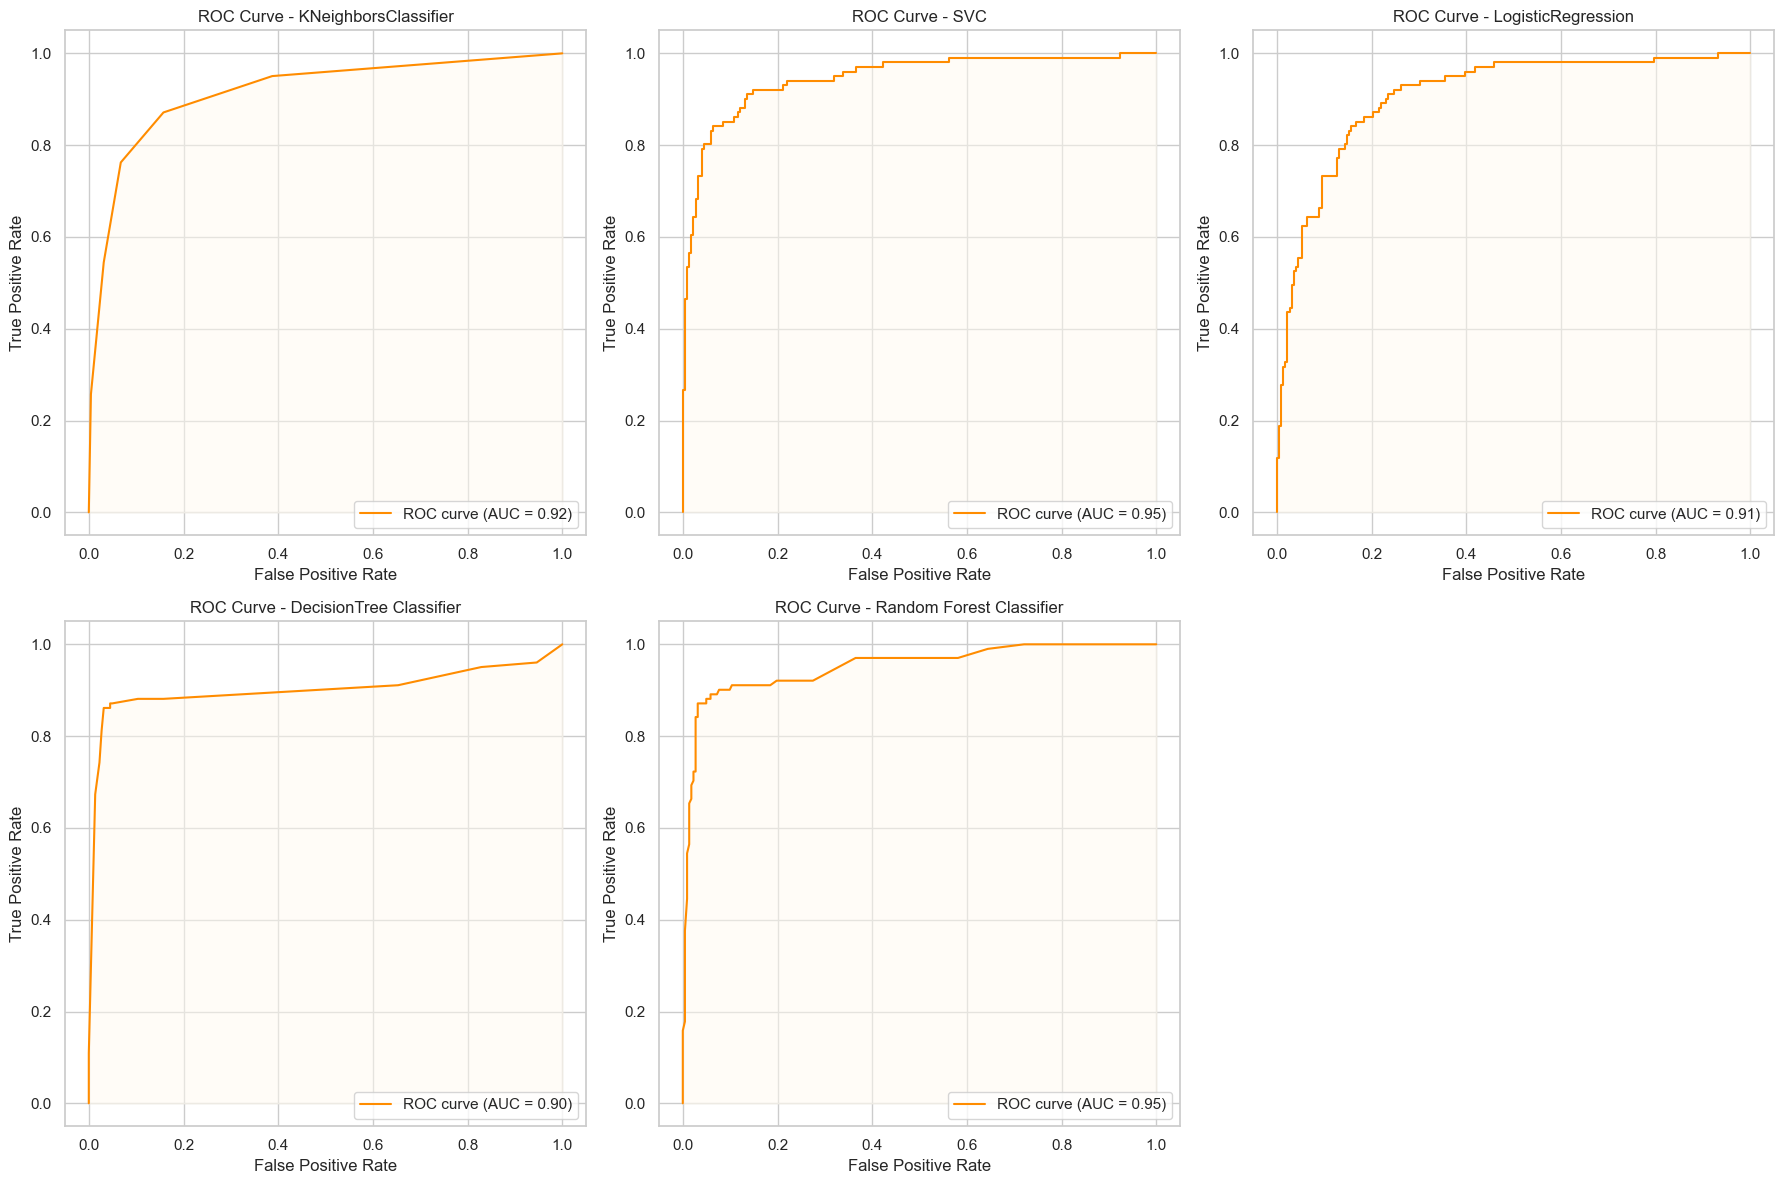

In [600]:
# Display ROC plots for each model excluding LinearSVC using significant predictors
show_ROC(sig_y_pred)

### Confusion matrices

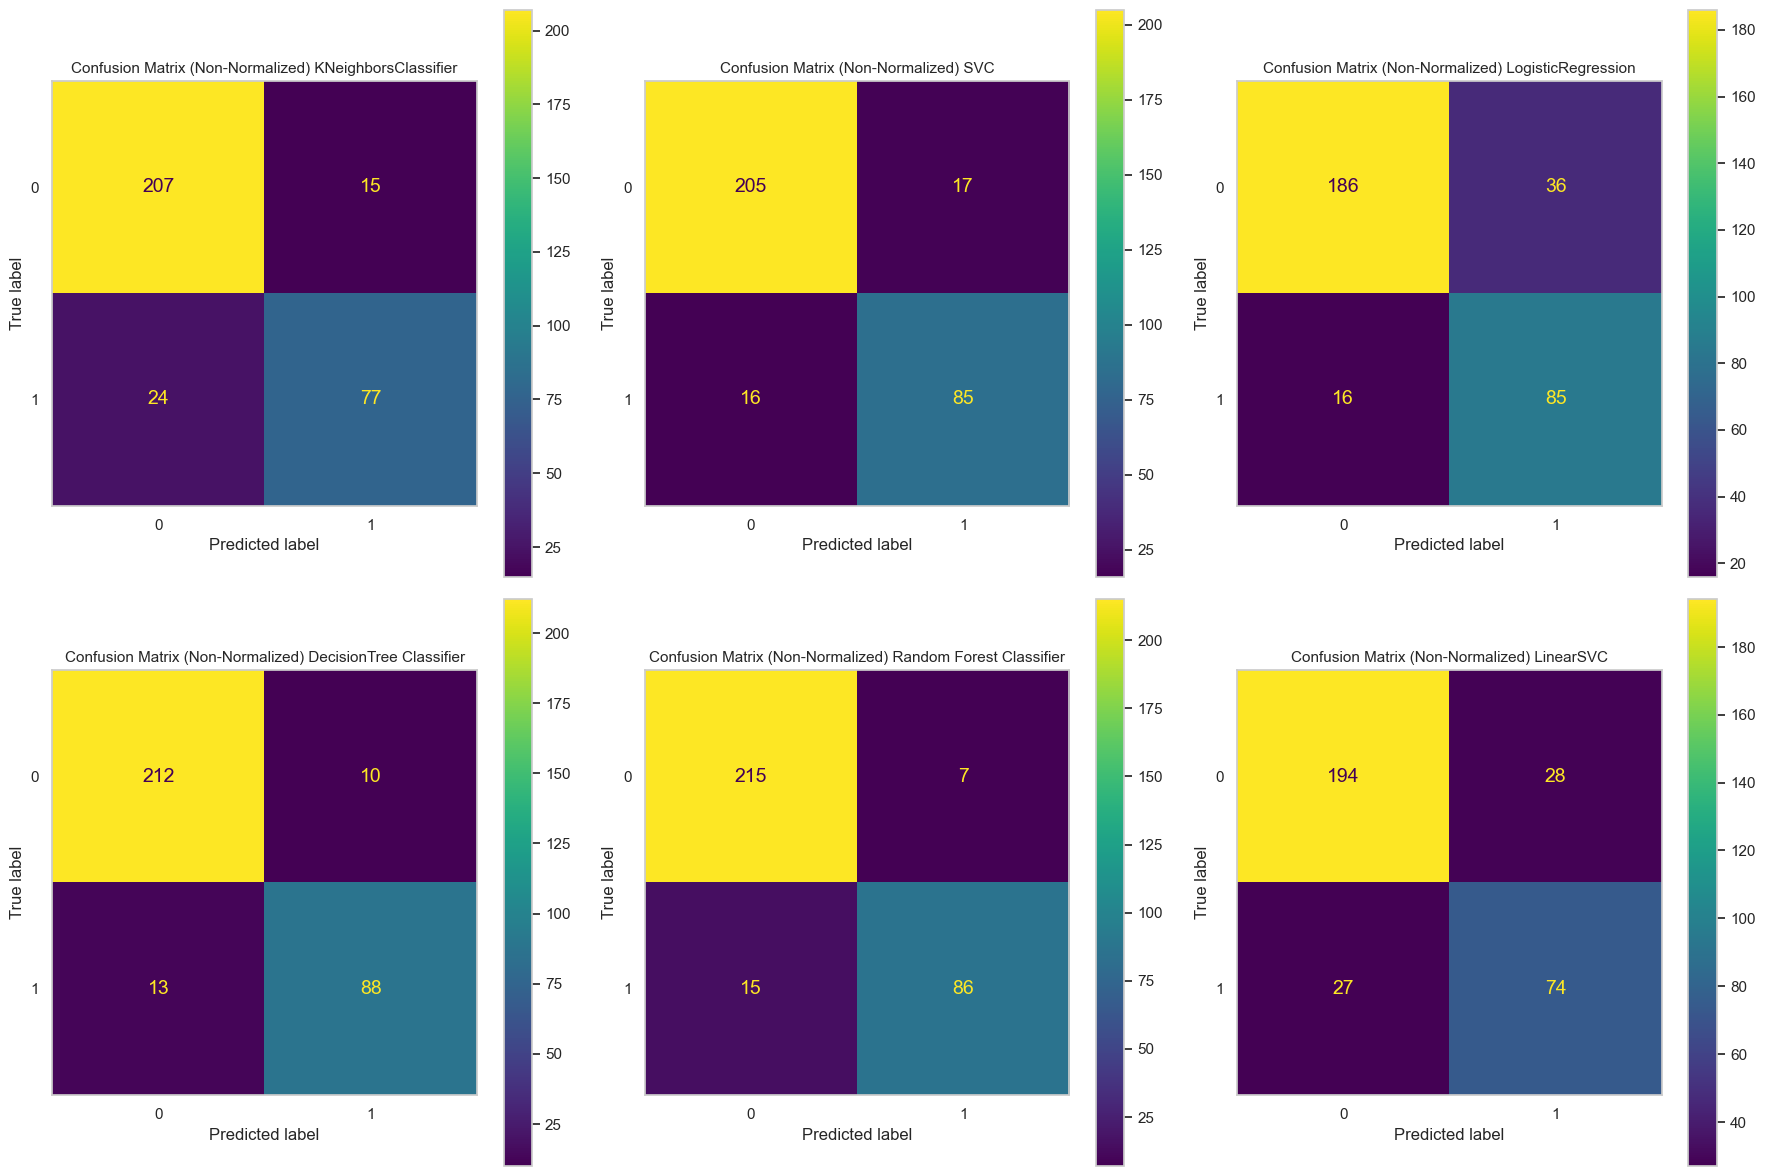

In [602]:
# Display confusion matrix for each of the model's using significant predictors
show_confusion(sig_y_pred)